In [1172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

### Загрузка датасетов

In [1173]:
data_CA = pd.read_csv('data\\CAvideos.csv', encoding = 'KOI8-R')
data_CA.insert(len(data_CA.columns), 'country', 'CA')
data_DE = pd.read_csv('data\\DEvideos.csv', encoding = 'KOI8-R')
data_DE.insert(len(data_DE.columns), 'country', 'DE')
data_FR = pd.read_csv('data\\FRvideos.csv', encoding = 'KOI8-R')
data_FR.insert(len(data_FR.columns), 'country', 'FR')
data_GB = pd.read_csv('data\\GBvideos.csv', encoding = 'KOI8-R')
data_GB.insert(len(data_GB.columns), 'country', 'GB')
data_IN = pd.read_csv('data\\INvideos.csv', encoding = 'KOI8-R')
data_IN.insert(len(data_IN.columns), 'country', 'IN')
data_JP = pd.read_csv('data\\JPvideos.csv', encoding = 'KOI8-R')
data_JP.insert(len(data_JP.columns), 'country', 'JP')
data_KR = pd.read_csv('data\\KRvideos.csv', encoding = 'KOI8-R')
data_KR.insert(len(data_KR.columns), 'country', 'KR')
data_MX = pd.read_csv('data\\MXvideos.csv', encoding = 'KOI8-R')
data_MX.insert(len(data_MX.columns), 'country', 'MX')
data_RU = pd.read_csv('data\\RUvideos.csv', encoding = 'KOI8-R')
data_RU.insert(len(data_RU.columns), 'country', 'RU')
data_US = pd.read_csv('data\\USvideos.csv', encoding = 'KOI8-R')
data_US.insert(len(data_US.columns), 'country', 'US')

In [1174]:
data_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO Б√╤ \n\nSUBSCRIBE Б√╨ ...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


Общий датасет

Код если не создавать столбец country. Однако я решил в общем датасете хранить информацию о стране. (Если есть способ сделать красивее, то подскажите

In [782]:
# paths = glob.glob('data/*.csv', recursive = True)
# sorted(paths)
# data = pd.concat([pd.read_csv(i, encoding = 'KOI8-R') for i in paths]) 


In [1175]:
data = pd.concat([data_CA, data_DE, data_FR, data_GB, data_IN, data_JP, data_KR, data_MX, data_RU, data_US])
data = data.sample(frac = 1)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
3040,ue2loCN34Sk,18.24.02,Ц─░2018/02/23Ц─▒Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√!Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌...,Tako,24,2018-02-23T13:41:22.000Z,"aqours|""guilty kiss""|""seiyuu""|""nama""|""live""|""s...",22744,823,8,90,https://i.ytimg.com/vi/ue2loCN34Sk/default.jpg,False,False,False,Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√О╪│Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌╓Ц┐Ё!!Ц──Aqour...,JP
19548,8tT3FhOA4-g,18.22.02,We Need To Talk About The Disgusting David Hog...,Philip DeFranco,24,2018-02-21T22:57:37.000Z,"Parkland|""Guns""|""Fake News""|""Conspiracy Theory...",986787,122732,5006,20509,https://i.ytimg.com/vi/8tT3FhOA4-g/default.jpg,False,False,False,"LetБ─≥s just focus on that facts, shall we? I ...",CA
8694,-37nIo_tLnk,17.27.12,Christmas Day 2000,vnbreyes,17,2009-12-15T23:26:32.000Z,"Christmas|""Day""|""2000""|""Wallace""|""Lakers""|""Bla...",2987,2,0,0,https://i.ytimg.com/vi/-37nIo_tLnk/default.jpg,False,False,False,Rasheed Wallace dropped 33 points and 13 rebou...,US
21589,eDY287x_5e4,18.04.03,La Rosa De Guadalupe | Un Buen Matrimonio (2/2),Cine Hd,22,2018-03-03T20:53:27.000Z,[none],17381,256,16,32,https://i.ytimg.com/vi/eDY287x_5e4/default.jpg,False,False,False,Si quieres un capц╜tulo dц╜melo en los comenta...,MX
37455,COb2bmhaFoM,18.28.05,Die Thundermans | Kampf gegen Candi Falconman ...,Nickelodeon Deutschland,24,2018-05-26T14:00:00.000Z,"Nickelodeon|""Nick Deutschland""|""Nickelodeon De...",43836,542,17,46,https://i.ytimg.com/vi/COb2bmhaFoM/default.jpg,False,False,False,Max und Phoebe kц╤nnen Candi Falconmans Zucker...,DE


In [1176]:
data.shape

(375942, 17)

In [1177]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [1178]:
data.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
country                       0
dtype: int64

In [1179]:
data['description']=data['description'].fillna("")

Из 375942 данных 19478 видео не имеют описания, что составляет 5%. Предпологаем, что это не ошибка, а в видео действительно нет описания. В дальнейшем исследуем зависимость популярности видео от наличия описания.

**Немного модифицируем таблицу.** Пофиксим формат времени, разделим информацию с *publishing_time* на *publishing_time* и *publishing_date*. Также из json файлов получаем информацию о жанре видео.

In [1180]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'], format ='%Y-%m-%dT%H:%M:%S.%fZ')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
3040,ue2loCN34Sk,2018-02-24,Ц─░2018/02/23Ц─▒Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√!Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌...,Tako,24,2018-02-23 13:41:22,"aqours|""guilty kiss""|""seiyuu""|""nama""|""live""|""s...",22744,823,8,90,https://i.ytimg.com/vi/ue2loCN34Sk/default.jpg,False,False,False,Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√О╪│Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌╓Ц┐Ё!!Ц──Aqour...,JP
19548,8tT3FhOA4-g,2018-02-22,We Need To Talk About The Disgusting David Hog...,Philip DeFranco,24,2018-02-21 22:57:37,"Parkland|""Guns""|""Fake News""|""Conspiracy Theory...",986787,122732,5006,20509,https://i.ytimg.com/vi/8tT3FhOA4-g/default.jpg,False,False,False,"LetБ─≥s just focus on that facts, shall we? I ...",CA
8694,-37nIo_tLnk,2017-12-27,Christmas Day 2000,vnbreyes,17,2009-12-15 23:26:32,"Christmas|""Day""|""2000""|""Wallace""|""Lakers""|""Bla...",2987,2,0,0,https://i.ytimg.com/vi/-37nIo_tLnk/default.jpg,False,False,False,Rasheed Wallace dropped 33 points and 13 rebou...,US
21589,eDY287x_5e4,2018-03-04,La Rosa De Guadalupe | Un Buen Matrimonio (2/2),Cine Hd,22,2018-03-03 20:53:27,[none],17381,256,16,32,https://i.ytimg.com/vi/eDY287x_5e4/default.jpg,False,False,False,Si quieres un capц╜tulo dц╜melo en los comenta...,MX
37455,COb2bmhaFoM,2018-05-28,Die Thundermans | Kampf gegen Candi Falconman ...,Nickelodeon Deutschland,24,2018-05-26 14:00:00,"Nickelodeon|""Nick Deutschland""|""Nickelodeon De...",43836,542,17,46,https://i.ytimg.com/vi/COb2bmhaFoM/default.jpg,False,False,False,Max und Phoebe kц╤nnen Candi Falconmans Zucker...,DE


In [1181]:
data.insert(5, 'publish_date', data['publish_time'].dt.date)
data['publish_date'] = data['publish_date'].astype('datetime64[ns]')
data['publish_time'] = data['publish_time'].dt.time
data.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
dtype: object

In [1182]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
3040,ue2loCN34Sk,2018-02-24,Ц─░2018/02/23Ц─▒Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√!Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌...,Tako,24,2018-02-23,13:41:22,"aqours|""guilty kiss""|""seiyuu""|""nama""|""live""|""s...",22744,823,8,90,https://i.ytimg.com/vi/ue2loCN34Sk/default.jpg,False,False,False,Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√О╪│Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌╓Ц┐Ё!!Ц──Aqour...,JP
19548,8tT3FhOA4-g,2018-02-22,We Need To Talk About The Disgusting David Hog...,Philip DeFranco,24,2018-02-21,22:57:37,"Parkland|""Guns""|""Fake News""|""Conspiracy Theory...",986787,122732,5006,20509,https://i.ytimg.com/vi/8tT3FhOA4-g/default.jpg,False,False,False,"LetБ─≥s just focus on that facts, shall we? I ...",CA
8694,-37nIo_tLnk,2017-12-27,Christmas Day 2000,vnbreyes,17,2009-12-15,23:26:32,"Christmas|""Day""|""2000""|""Wallace""|""Lakers""|""Bla...",2987,2,0,0,https://i.ytimg.com/vi/-37nIo_tLnk/default.jpg,False,False,False,Rasheed Wallace dropped 33 points and 13 rebou...,US
21589,eDY287x_5e4,2018-03-04,La Rosa De Guadalupe | Un Buen Matrimonio (2/2),Cine Hd,22,2018-03-03,20:53:27,[none],17381,256,16,32,https://i.ytimg.com/vi/eDY287x_5e4/default.jpg,False,False,False,Si quieres un capц╜tulo dц╜melo en los comenta...,MX
37455,COb2bmhaFoM,2018-05-28,Die Thundermans | Kampf gegen Candi Falconman ...,Nickelodeon Deutschland,24,2018-05-26,14:00:00,"Nickelodeon|""Nick Deutschland""|""Nickelodeon De...",43836,542,17,46,https://i.ytimg.com/vi/COb2bmhaFoM/default.jpg,False,False,False,Max und Phoebe kц╤nnen Candi Falconmans Zucker...,DE


Добавим информацию о том, через сколько времени алгоритмы ютуба сделали видео рекомендованным

In [1183]:
data.insert(7, 'days_different', data['trending_date'] - data['publish_date'])

In [1184]:
data['days_different'] = data['days_different'].dt.days.astype('int64')

In [1185]:
import json

id_dict = {}

with open('data/US_category_id.json', 'r') as JSON:
    json_dict = json.load(JSON)
    for fields in json_dict['items']:
        id_dict[fields['id']] = fields['snippet']['title']
            
id_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [1186]:
data.insert(len(data.columns), 'genre', pd.Series(id_dict[str(i)] for i in data['category_id']))

In [1187]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre
3040,ue2loCN34Sk,2018-02-24,Ц─░2018/02/23Ц─▒Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√!Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌...,Tako,24,2018-02-23,13:41:22,1,"aqours|""guilty kiss""|""seiyuu""|""nama""|""live""|""s...",22744,823,8,90,https://i.ytimg.com/vi/ue2loCN34Sk/default.jpg,False,False,False,Ц┐╘Ц┐√Ц┐╘Ц┌╓Ц┐√О╪│Ц┌╣Ц┐ЁЦ┌╥Ц┐ёЦ┌╓Ц┐Ё!!Ц──Aqour...,JP,Entertainment
19548,8tT3FhOA4-g,2018-02-22,We Need To Talk About The Disgusting David Hog...,Philip DeFranco,24,2018-02-21,22:57:37,1,"Parkland|""Guns""|""Fake News""|""Conspiracy Theory...",986787,122732,5006,20509,https://i.ytimg.com/vi/8tT3FhOA4-g/default.jpg,False,False,False,"LetБ─≥s just focus on that facts, shall we? I ...",CA,Entertainment
8694,-37nIo_tLnk,2017-12-27,Christmas Day 2000,vnbreyes,17,2009-12-15,23:26:32,2934,"Christmas|""Day""|""2000""|""Wallace""|""Lakers""|""Bla...",2987,2,0,0,https://i.ytimg.com/vi/-37nIo_tLnk/default.jpg,False,False,False,Rasheed Wallace dropped 33 points and 13 rebou...,US,Sports
21589,eDY287x_5e4,2018-03-04,La Rosa De Guadalupe | Un Buen Matrimonio (2/2),Cine Hd,22,2018-03-03,20:53:27,1,[none],17381,256,16,32,https://i.ytimg.com/vi/eDY287x_5e4/default.jpg,False,False,False,Si quieres un capц╜tulo dц╜melo en los comenta...,MX,Entertainment
37455,COb2bmhaFoM,2018-05-28,Die Thundermans | Kampf gegen Candi Falconman ...,Nickelodeon Deutschland,24,2018-05-26,14:00:00,2,"Nickelodeon|""Nick Deutschland""|""Nickelodeon De...",43836,542,17,46,https://i.ytimg.com/vi/COb2bmhaFoM/default.jpg,False,False,False,Max und Phoebe kц╤nnen Candi Falconmans Zucker...,DE,Entertainment


Добавим соотношение лайков к дизлайкам (рейтинг) и отсортируем по возрастанию

In [1188]:
data.insert(0, 'rating', data['likes'] / ((data['dislikes'] + (data['likes']))))
data['rating'] = data['rating'].fillna(0)
data = data.sort_values(['rating', 'views'], ascending=False)

In [1189]:
data.head()

,rating,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre
38872,1.0,N1HAMUAXzbs,2018-06-14,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,23,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,123856,0,10903,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Film & Animation
38704,1.0,N1HAMUAXzbs,2018-06-13,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,22,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,112723,0,10840,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,People & Blogs
38528,1.0,N1HAMUAXzbs,2018-06-12,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,21,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,103086,0,10730,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,People & Blogs
38356,1.0,N1HAMUAXzbs,2018-06-11,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,20,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,100102,0,10612,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Howto & Style
38188,1.0,N1HAMUAXzbs,2018-06-10,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,19,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,99719,0,10591,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Comedy


In [1190]:
data.shape

(375942, 21)

In [1191]:
data_with_copies = data.copy()

In [1192]:
data = data.sort_values(['video_id', 'trending_date'])

In [1193]:
data_before_drop_bad_names = data.copy()

In [1194]:
data_drop_bad_names = data.copy() # Без плохих имен + запоминает последнее появление видео в трендах

In [1195]:
data_first_appearance = data.copy() # Хранит первое появление видео в трендах

In [1196]:
data_first_appearance = data_first_appearance.drop_duplicates(subset = ['video_id', 'country'], keep = "first")
data_first_appearance = data_first_appearance.drop(index = data_first_appearance[data_first_appearance['video_id'] == '#NAME?'].index, axis = 0)
data_first_appearance = data_first_appearance.drop(index = data_first_appearance[data_first_appearance['video_id'] == '#VALUE!'].index, axis = 0)
data_first_appearance = data_first_appearance.sort_values(by=['rating', 'views'], ascending=False)

In [1197]:
data_drop_bad_names = data_drop_bad_names.drop_duplicates(subset = ['video_id', 'country'], keep = "last")
data_drop_bad_names = data_drop_bad_names.drop(index = data_drop_bad_names[data_drop_bad_names['video_id'] == '#NAME?'].index, axis = 0)
data_drop_bad_names = data_drop_bad_names.drop(index = data_drop_bad_names[data_drop_bad_names['video_id'] == '#VALUE!'].index, axis = 0)
data_drop_bad_names = data_drop_bad_names.sort_values(by=['rating', 'views'], ascending=False)

In [1199]:
data_drop_bad_names.shape

(207123, 21)

Преобразования с таблицей закончены

### Статистика

In [1200]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#### Статистика видео, попавших в тренды в различных странах (одни и те же видео возможны в различных странах)

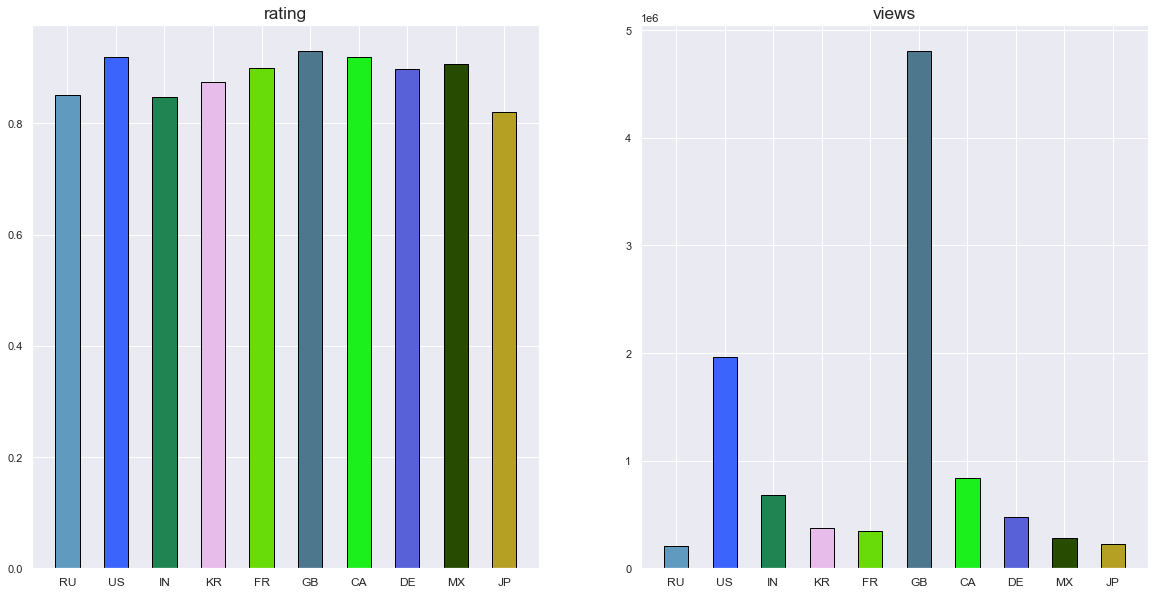

In [1201]:
# only 2 properties in properties_list
def visualize_average_stats(df, country_list: list, properties_list: list):
    
# calculate average
    stats_common = []
    for property in properties_list:
        stat = []
        for country in country_list:
            stat.append(df[df['country']== country][property].agg('sum')/len(df[df['country']== country].index.unique()))           
        stats_common.append(stat)
        

# draw
    _, [ax1, ax2] = plt.subplots(ncols=2,nrows=1, figsize=(20,10))

    index = np.arange(len(country_list))
#     print(index)
    bar_width = 0.1
    opacity = 0.4

    def rdm():
        return (random.random(), random.random(), random.random())
    
    color_rdm = [rdm() for i in range(len(country_list))]
    for j, ax in enumerate([ax1, ax2]):
        ax.bar(index, stats_common[j], bar_width * 5, color=color_rdm, edgecolor='black')
        ax.set_title(properties_list[j], fontsize ='xx-large')
        ax.set_xticks(index)
        ax.set_xticklabels(country_list, fontsize ='large')
            

            
country_list = ['RU', 'US', 'IN', 'KR', 'FR', 'GB', 'CA', 'DE', 'MX', 'JP'] 
properties_list = ['rating', 'views']
visualize_average_stats(data_drop_bad_names, country_list, properties_list)

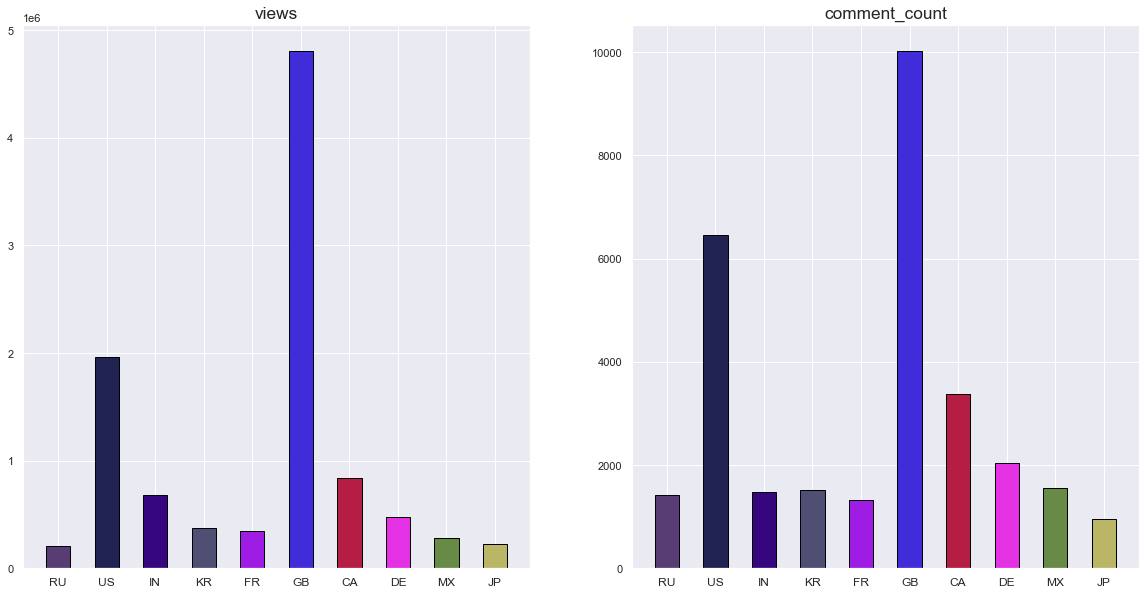

In [1202]:
properties_list = ['views', 'comment_count']  
visualize_average_stats(data_drop_bad_names, country_list, properties_list)

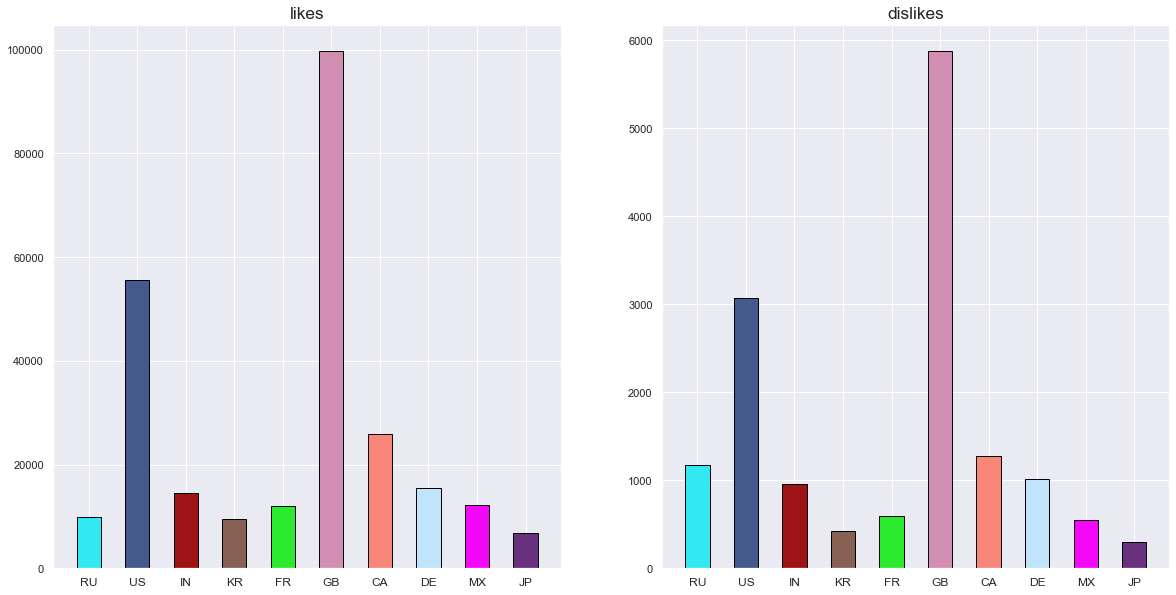

In [1203]:
properties_list = ['likes', 'dislikes']  
visualize_average_stats(data_drop_bad_names, country_list, properties_list)

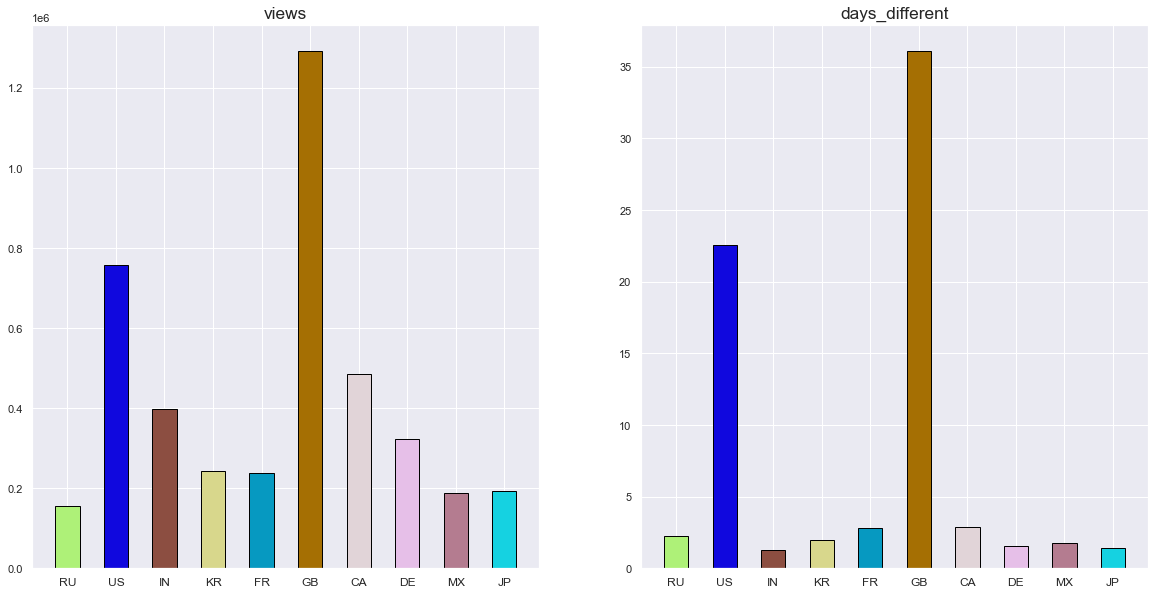

In [1204]:
properties_list = ['views', 'days_different']  
visualize_average_stats(data_first_appearance, country_list, properties_list)

##### Статистика уникальных видео, попавших в тренды только в 1 страну (не учитывая пересечения)

In [1205]:
data_no_inter = data_drop_bad_names.drop_duplicates(subset=['video_id'], keep = False)

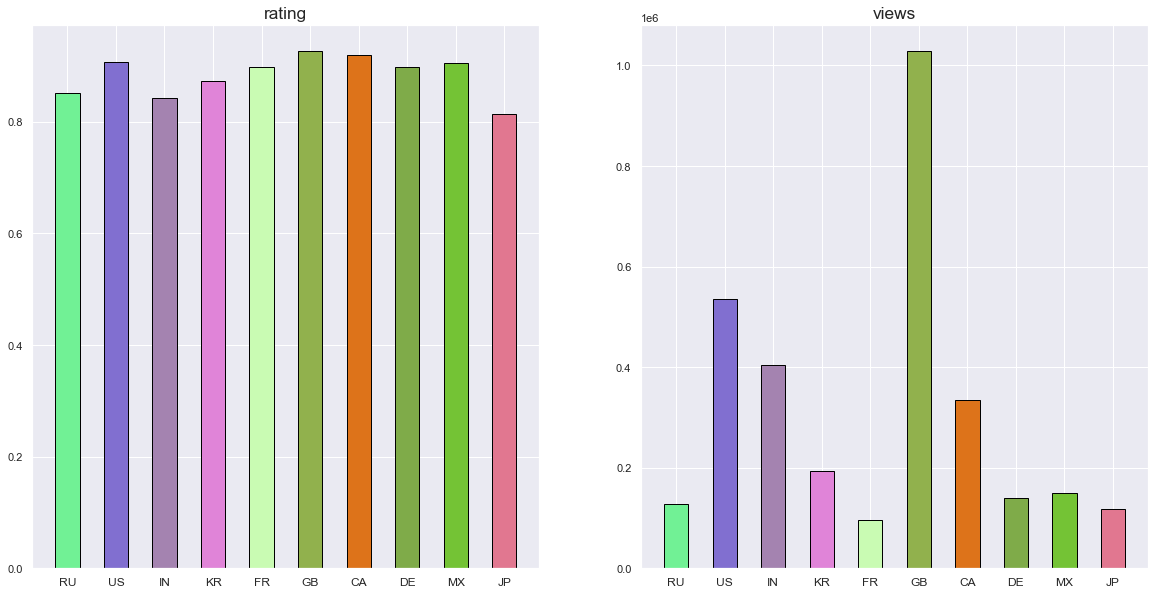

In [1206]:
properties_list = ['rating', 'views']
visualize_average_stats(data_no_inter, country_list, properties_list)

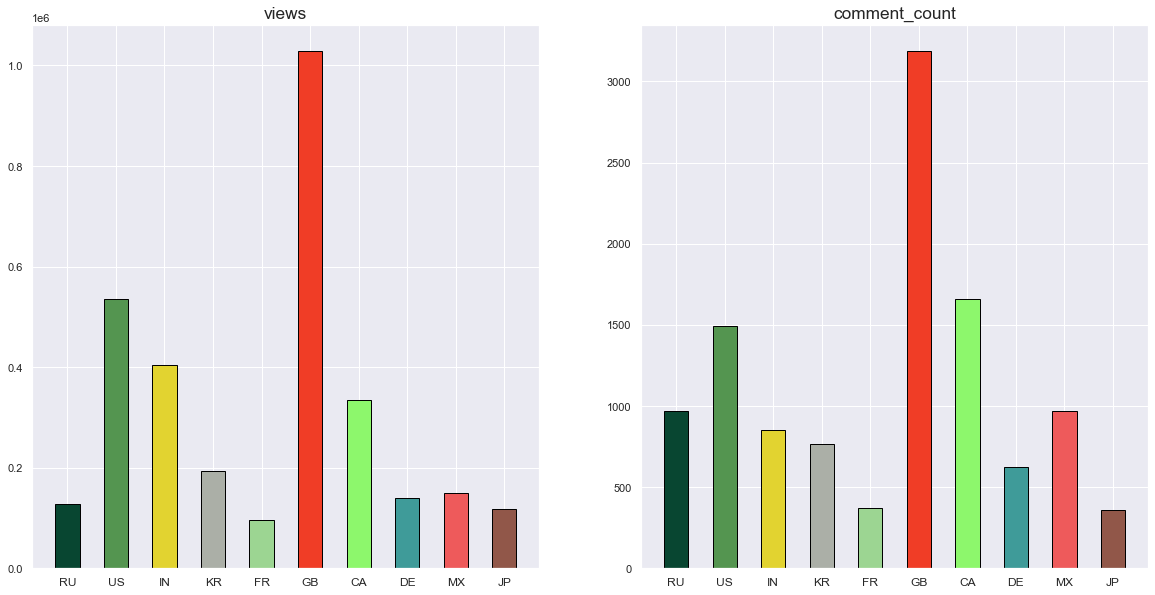

In [1207]:
properties_list = ['views', 'comment_count']  
visualize_average_stats(data_no_inter, country_list, properties_list)

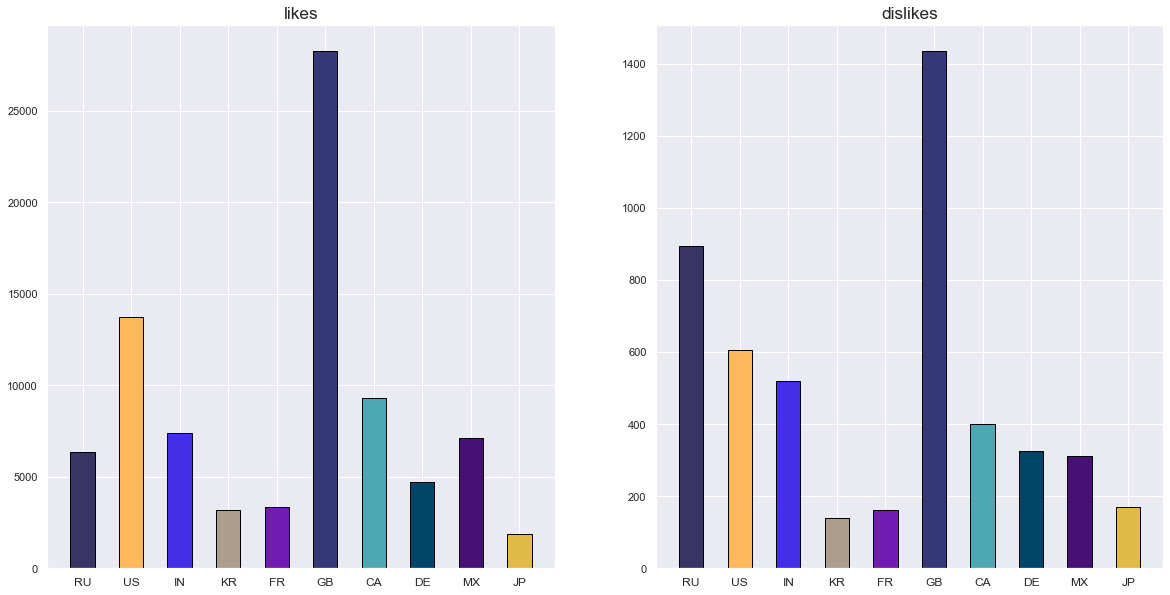

In [1208]:
properties_list = ['likes', 'dislikes']  
visualize_average_stats(data_no_inter, country_list, properties_list)

In [1209]:
data_fi_app = data_no_inter.copy()
data_fi_app = data_fi_app.drop_duplicates(subset = ['video_id', 'country'], keep = "first")
data_fi_app= data_fi_app.drop(index = data_fi_app[data_fi_app['video_id'] == '#NAME?'].index, axis = 0)
data_fi_app = data_fi_app.drop(index = data_fi_app[data_fi_app['video_id'] == '#VALUE!'].index, axis = 0)
data_fi_app = data_fi_app.sort_values(by=['rating', 'views'], ascending=False)

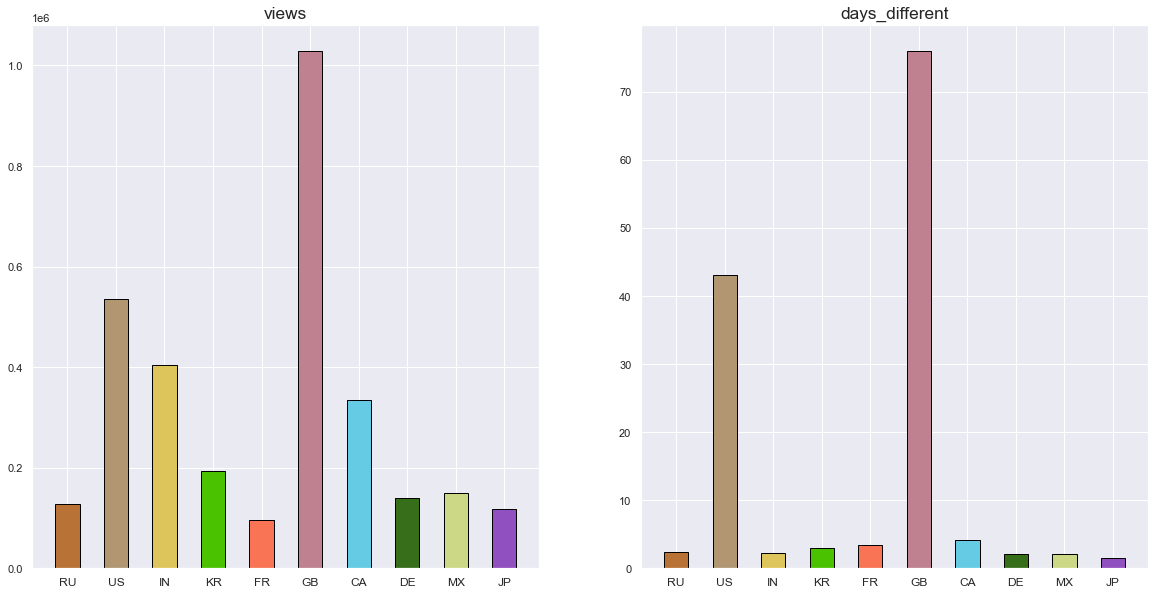

In [1210]:
properties_list = ['views', 'days_different']  
visualize_average_stats(data_fi_app, country_list, properties_list)

Сравним влияние того, что видео попадает в тренды в нескольких странах более наглядно

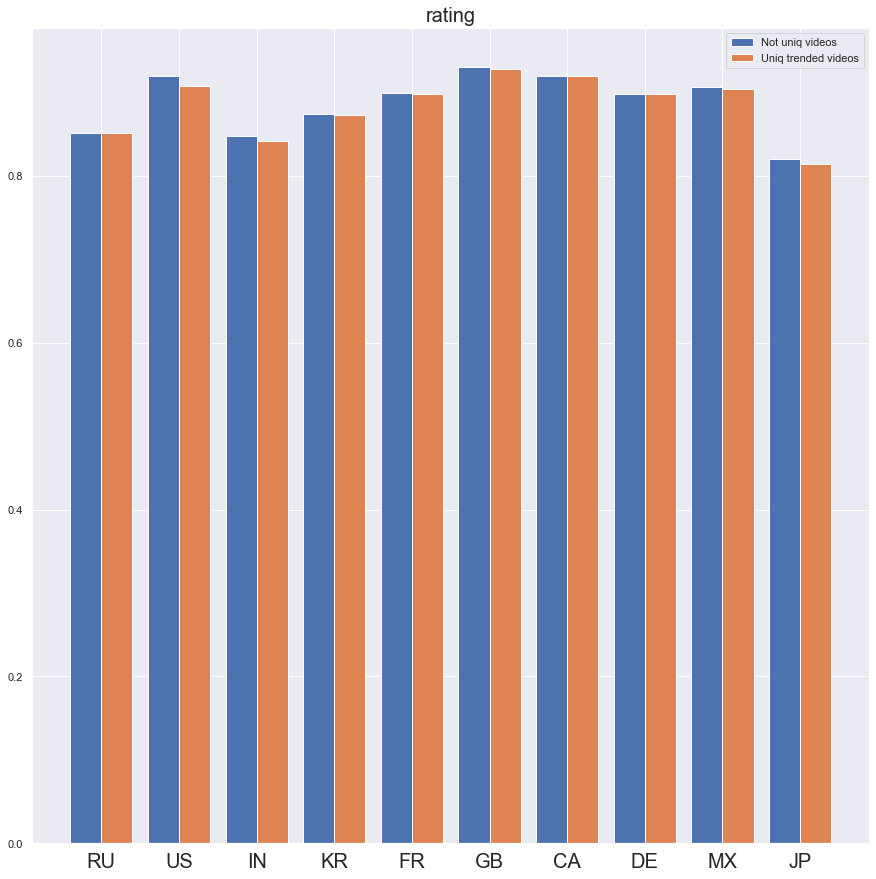

In [1211]:
# only 2 properties in properties_list
def compare_visualize_average_stats(df, df_uniq, country_list: list, properties_list: list):
    
# calculate average
    stats_common = []
    stats_common_uniq = []
    for property in properties_list:
        stat = []
        stat_uniq = []
        for country in country_list:
            stat.append(df[df['country']== country][property].agg('sum')/len(df[df['country']== country].index.unique())) 
            stat_uniq.append(df_uniq[df_uniq['country']== country][property].agg('sum')/len(df_uniq[df_uniq['country']== country].index.unique())) 
        stats_common.append(stat)
        stats_common_uniq.append(stat_uniq)
        

# draw


    index = np.arange(len(country_list))
    plt.figure(figsize=(15,15))
    plt.bar(index - 0.2, stats_common[0], 0.4, label = 'Not uniq videos')
    plt.bar(index + 0.2, stats_common_uniq[0], 0.4, label = 'Uniq trended videos') 

    plt.xticks(index, country_list, fontsize =20)
    plt.legend()
    plt.title(properties_list[0], fontsize =20)
    plt.show()            

            
country_list = ['RU', 'US', 'IN', 'KR', 'FR', 'GB', 'CA', 'DE', 'MX', 'JP'] 
properties_list = ['rating']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)


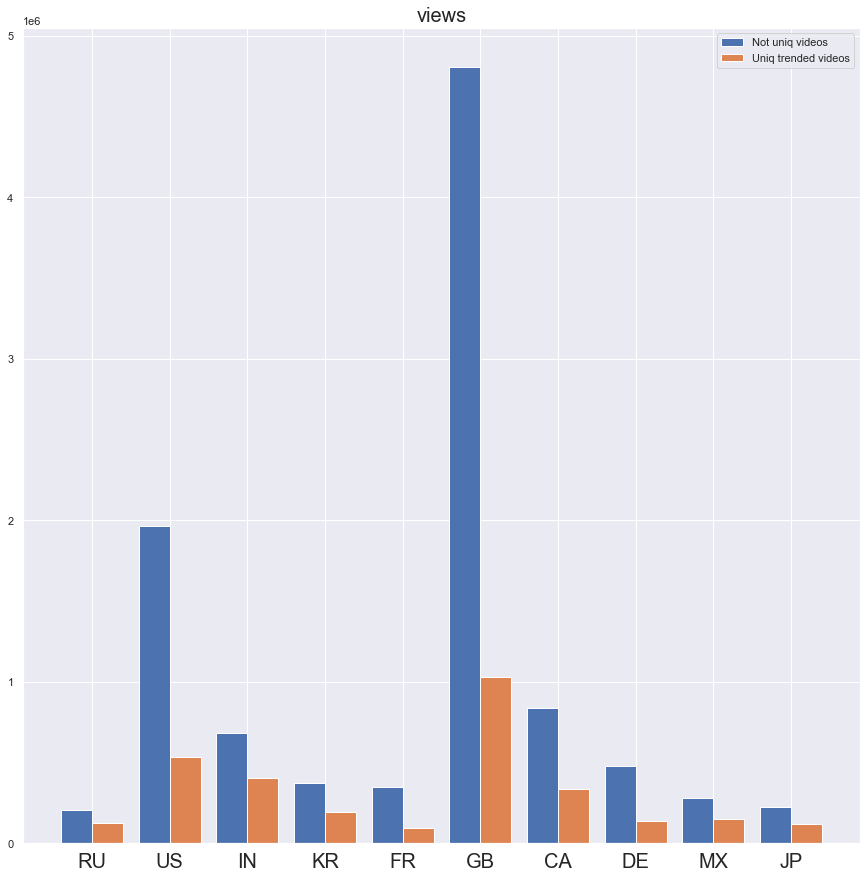

In [1212]:
properties_list = ['views']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

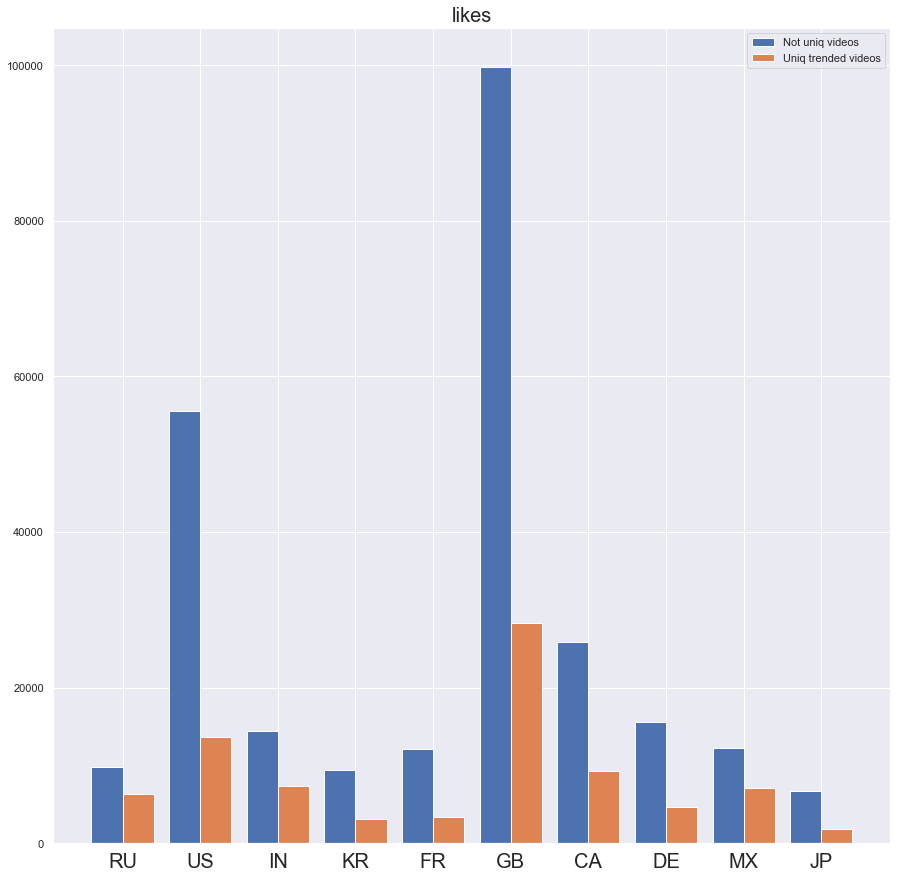

In [1213]:
properties_list = ['likes']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

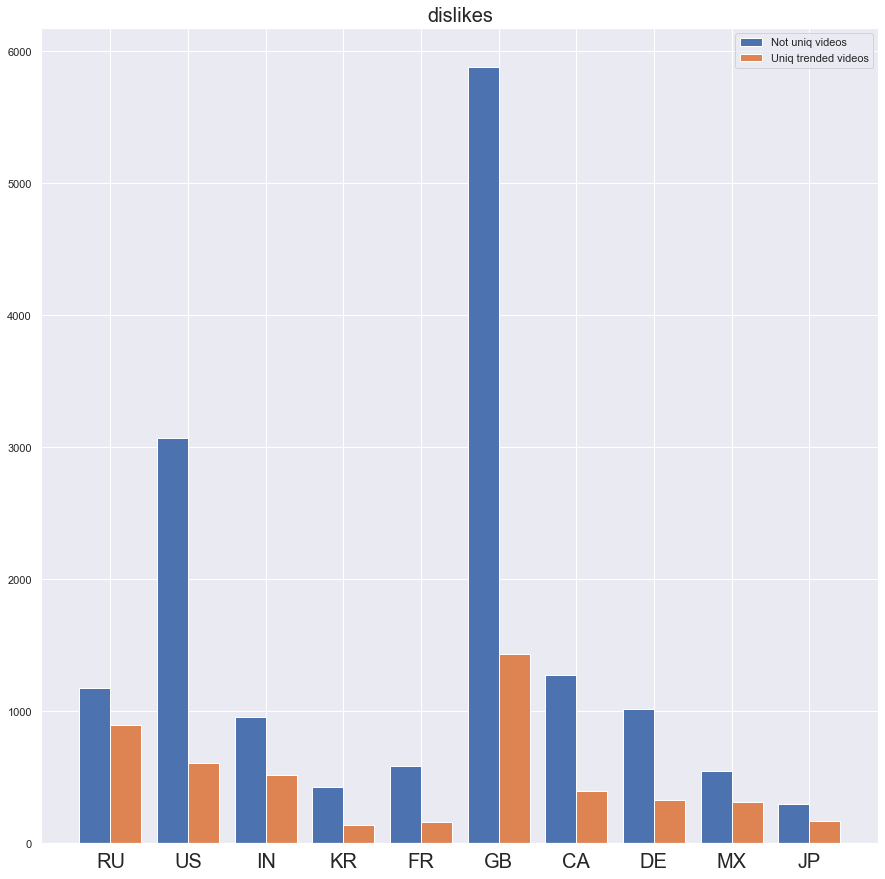

In [1214]:
properties_list = ['dislikes']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

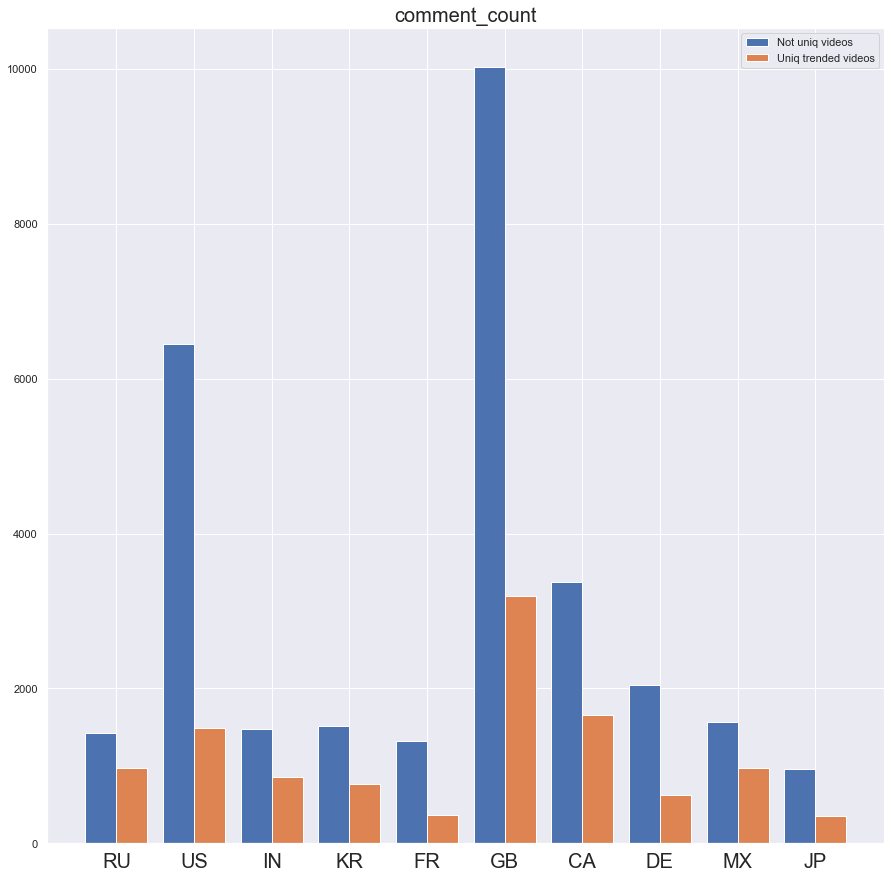

In [1215]:
properties_list = ['comment_count']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

##### Статистика для видео среди всех стран

Датасет без повторений видео

In [1216]:
data_no_duplicates = data.copy()
data_no_duplicates = data_no_duplicates.sort_values('views')
data_no_duplicates = data_no_duplicates.drop_duplicates(subset = ['video_id'], keep = "last")

In [1217]:
def visualize_for_video(my_df, column, name, num=10): # getting the top 10 videos by default
    sorted_df = []
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar(figsize=(30,20),fontsize=25)
    print(type(ax))    
  
    labels = []
 
    index = np.arange(num)
    for item in sorted_df['title']:
        labels.append(item[:20] + '...')        
 
    ax.set_xticklabels(labels, rotation=45, fontsize=25)
    ax.bar(index,sorted_df[column],color = (random.random(), random.random(), random.random()), edgecolor='black')
    ax.set_title(column + ',' + name, fontsize =40)
    
    plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


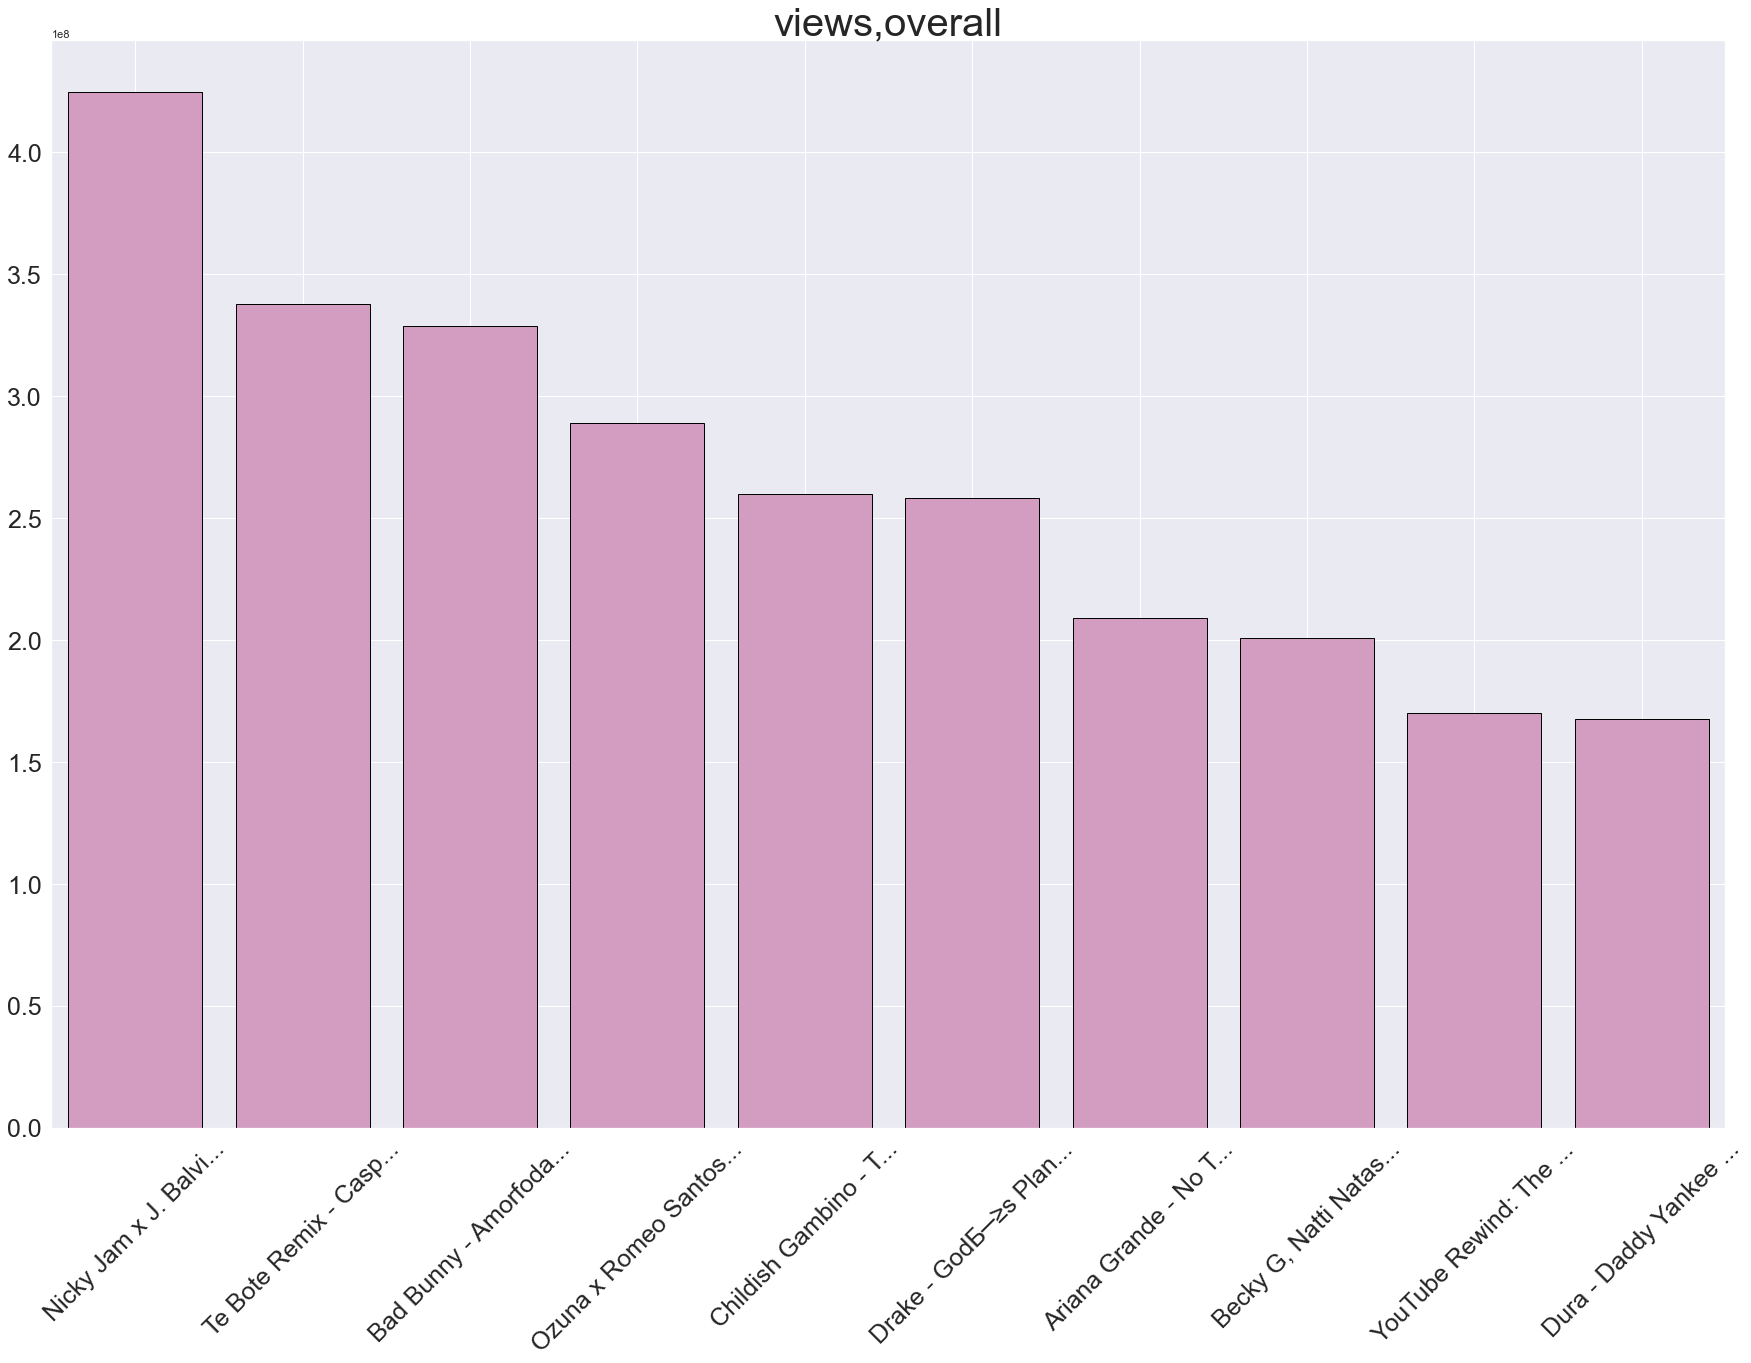

In [1218]:
visualize_for_video(data_no_duplicates, 'views', 'overall')

<class 'matplotlib.axes._subplots.AxesSubplot'>


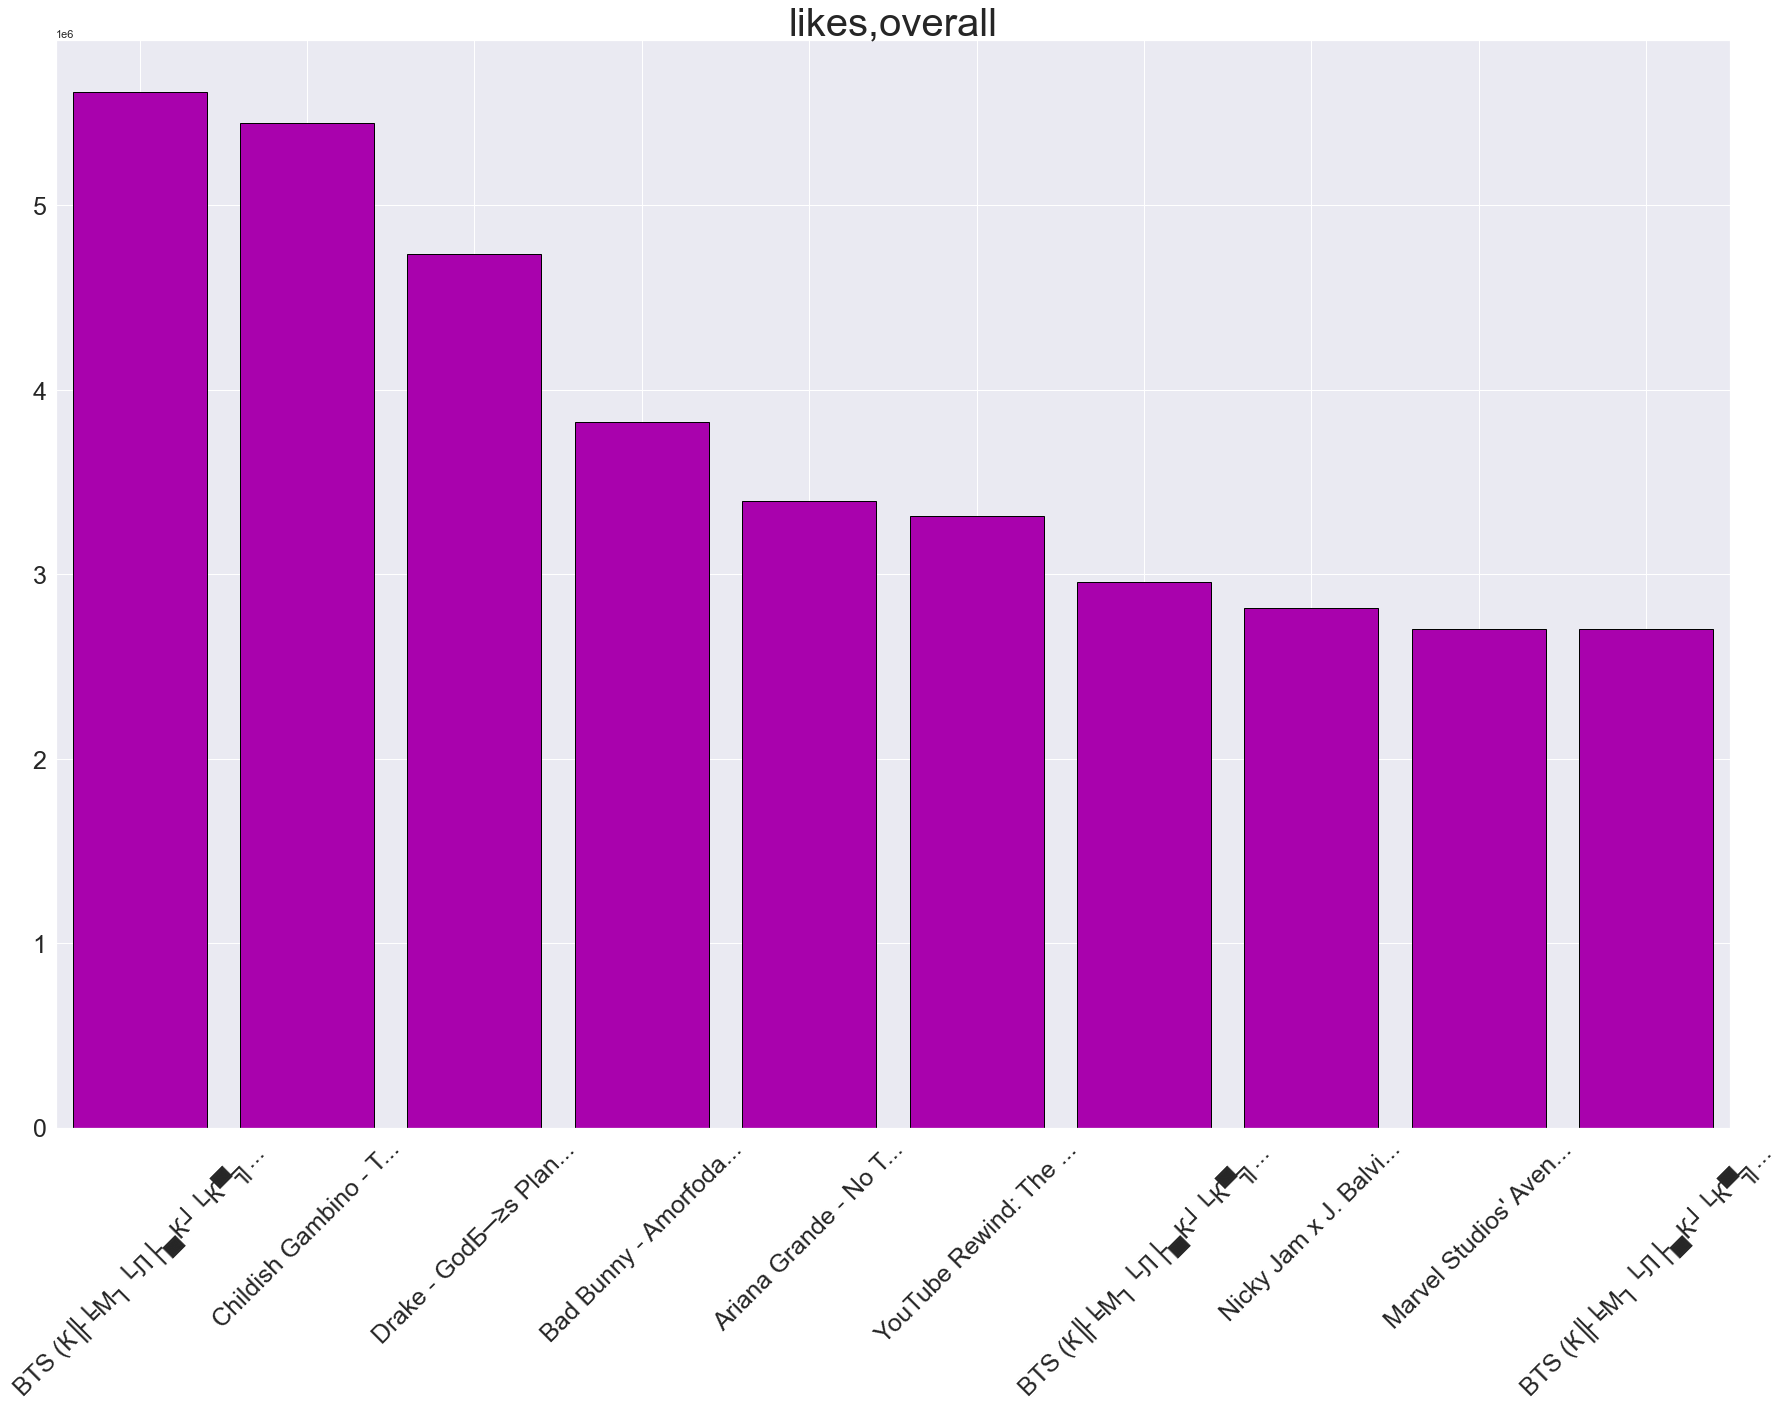

In [1219]:
visualize_for_video(data_no_duplicates , 'likes', 'overall')

<class 'matplotlib.axes._subplots.AxesSubplot'>


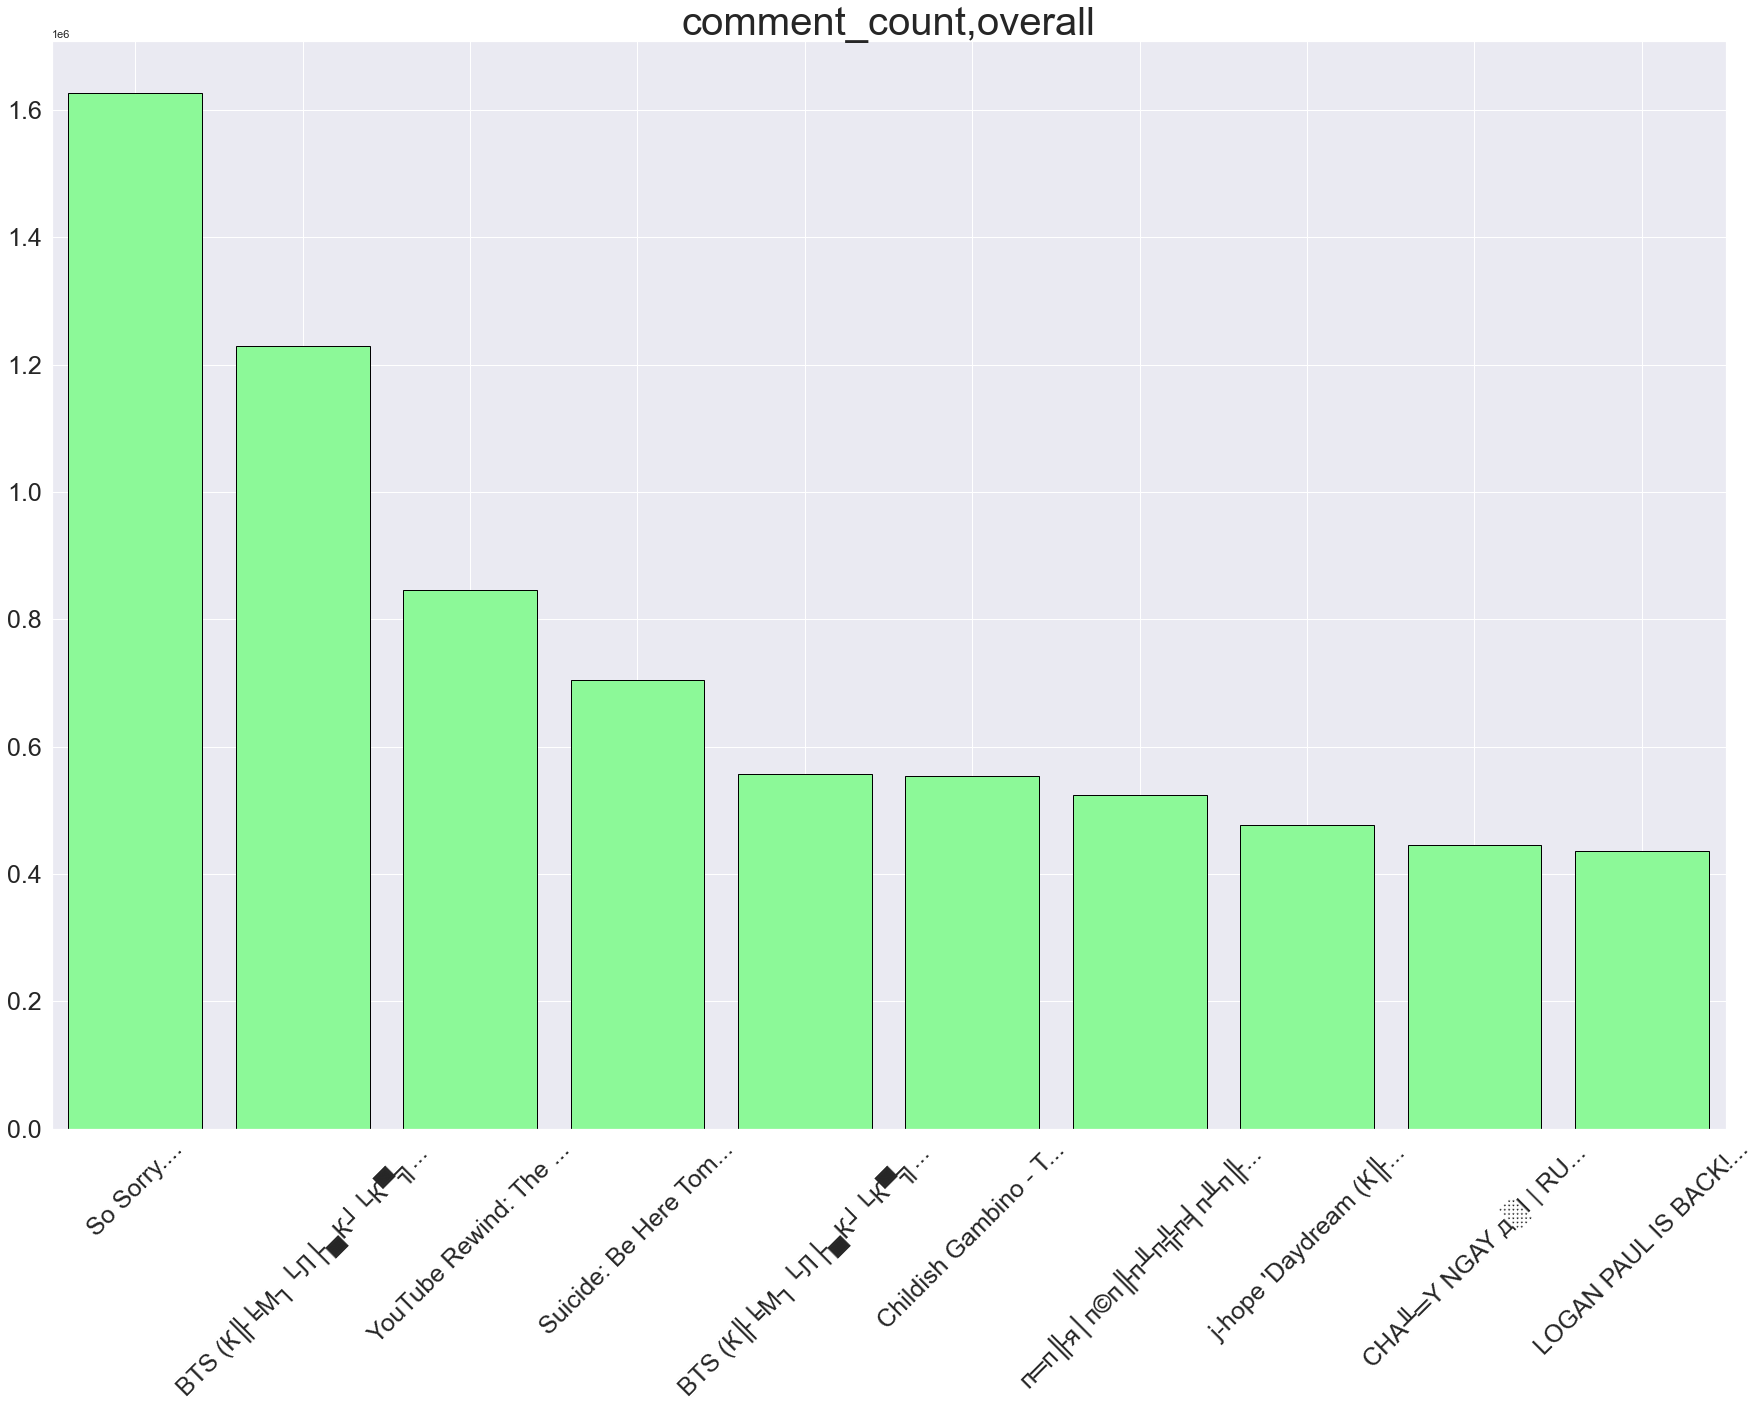

In [1220]:
visualize_for_video(data_no_duplicates, 'comment_count', 'overall')

<class 'matplotlib.axes._subplots.AxesSubplot'>


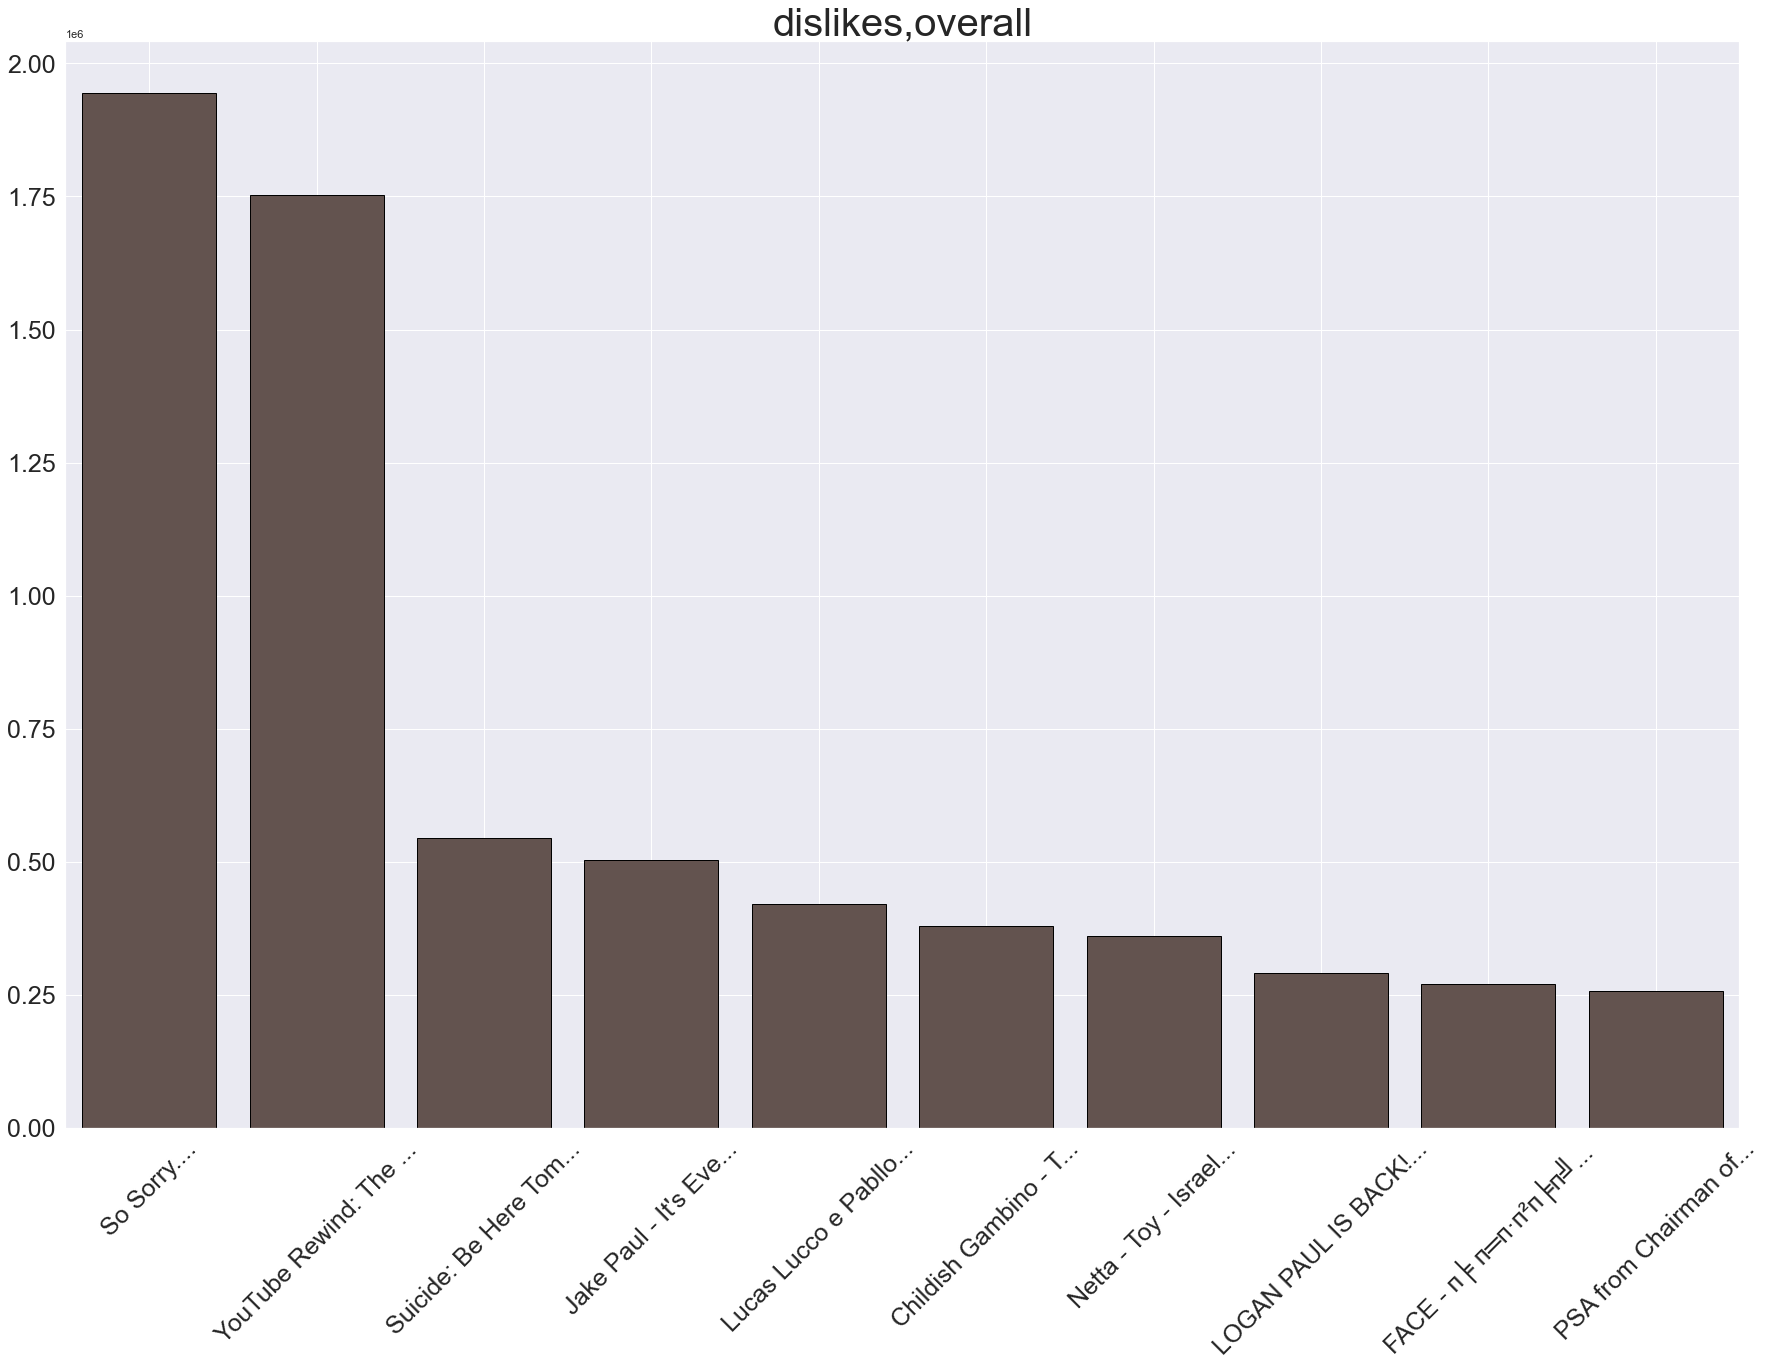

In [1221]:
visualize_for_video(data_no_duplicates, 'dislikes', 'overall')

##### Статистика для видео по странам

Проделаем необходимые преобразования

In [1222]:
for i in [data_CA, data_DE, data_FR, data_GB, data_IN, data_JP, data_KR, data_MX, data_RU, data_US]:
    i.insert(0, 'rating', i['likes'] / ((i['dislikes'] + (i['likes']))))
    i['rating'] = i['rating'].fillna(0)
    i = i.sort_values(['rating', 'views'], ascending=False)
    i = i.drop_duplicates(subset = ['video_id', 'country'], keep = "last")
    i = i.drop(index = i[i['video_id'] == '#NAME?'].index, axis = 0)
    i = i.drop(index = i[i['video_id'] == '#VALUE!'].index, axis = 0)
    i = i.sort_values(by=['rating', 'views'], ascending=False)

<class 'matplotlib.axes._subplots.AxesSubplot'>


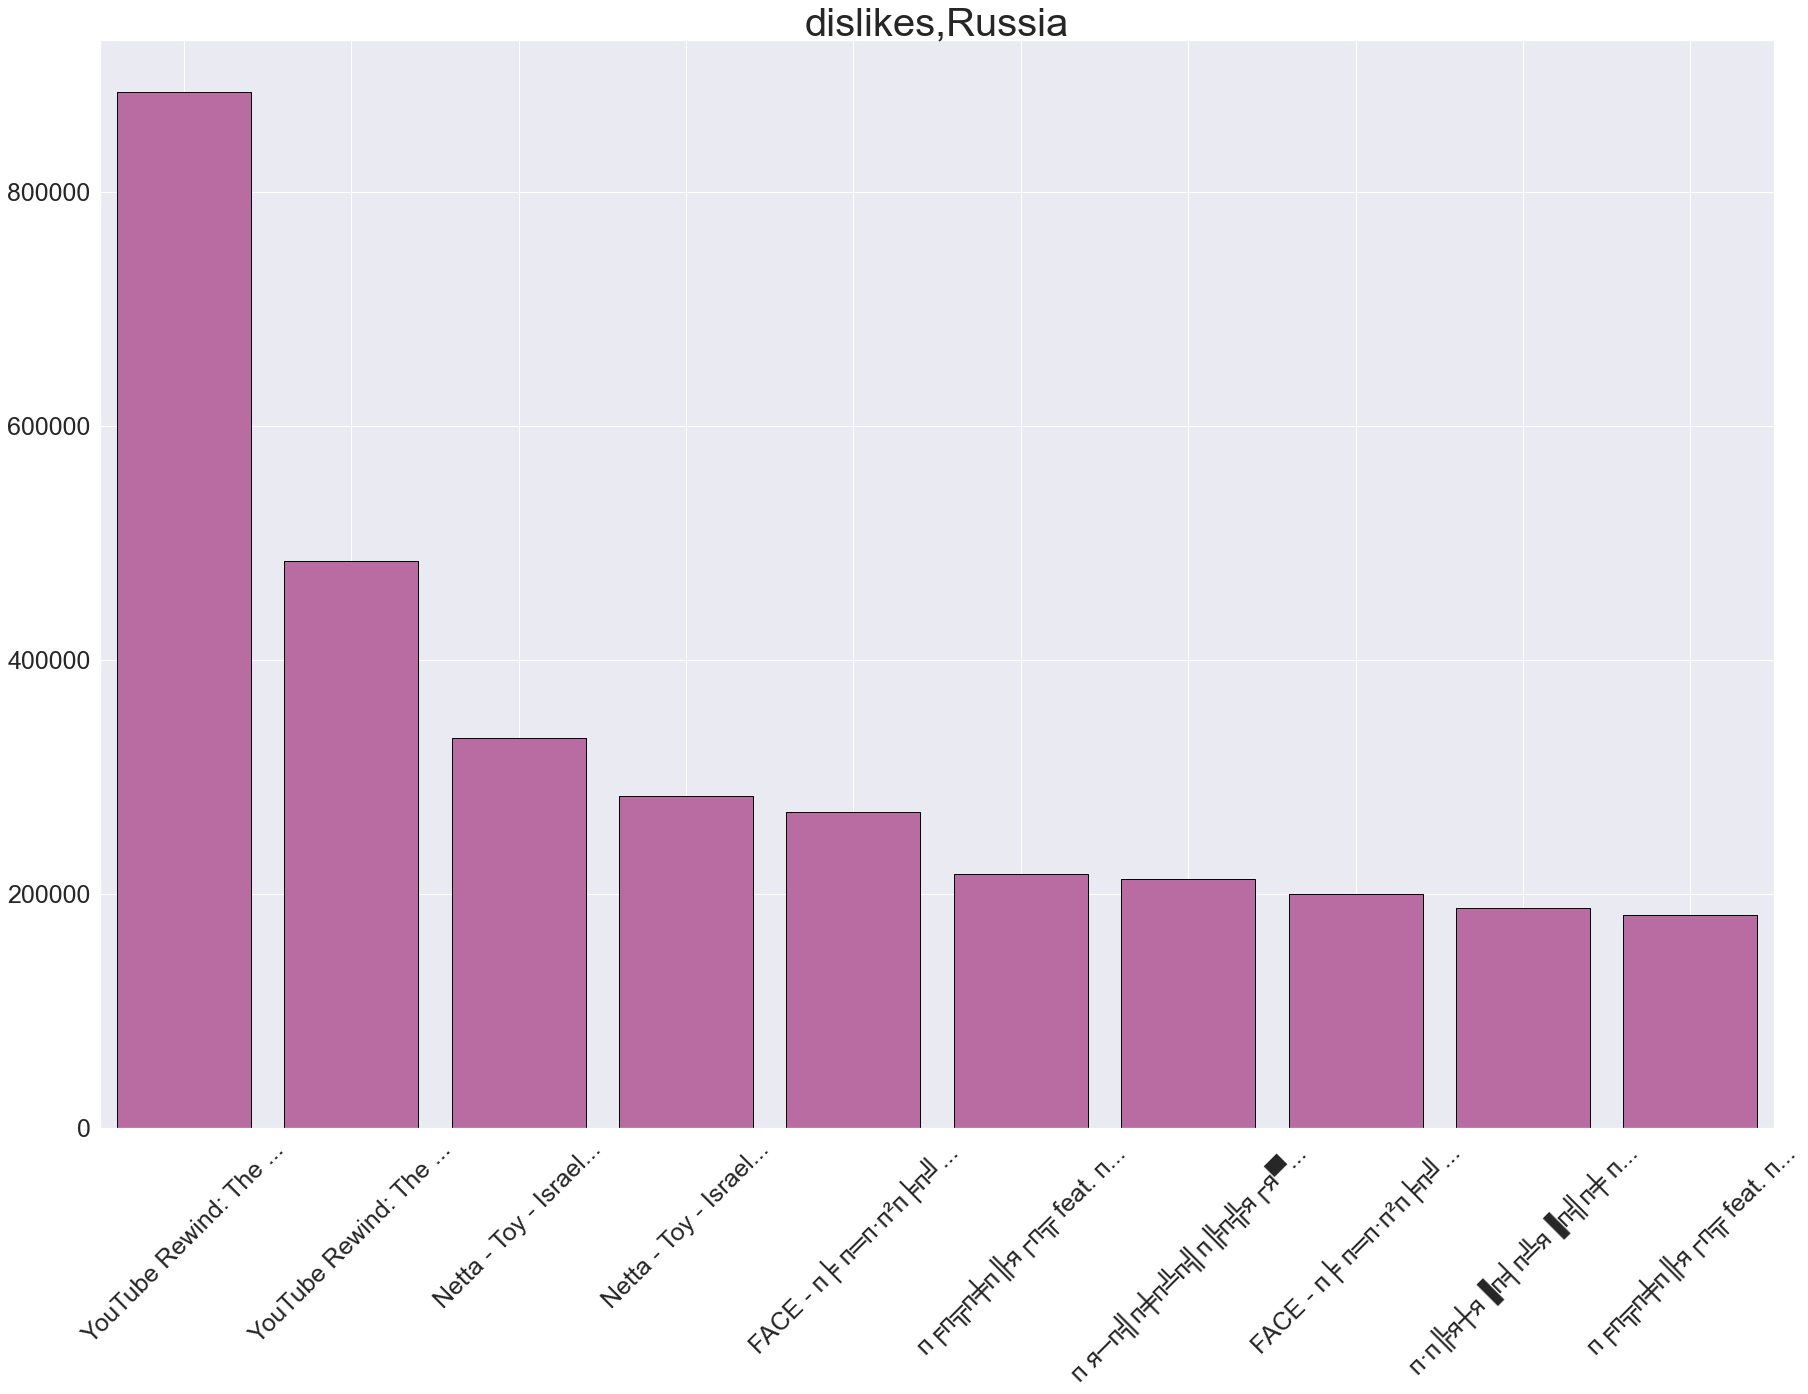

In [1223]:
visualize_for_video(data_RU, 'dislikes', 'Russia')

<class 'matplotlib.axes._subplots.AxesSubplot'>


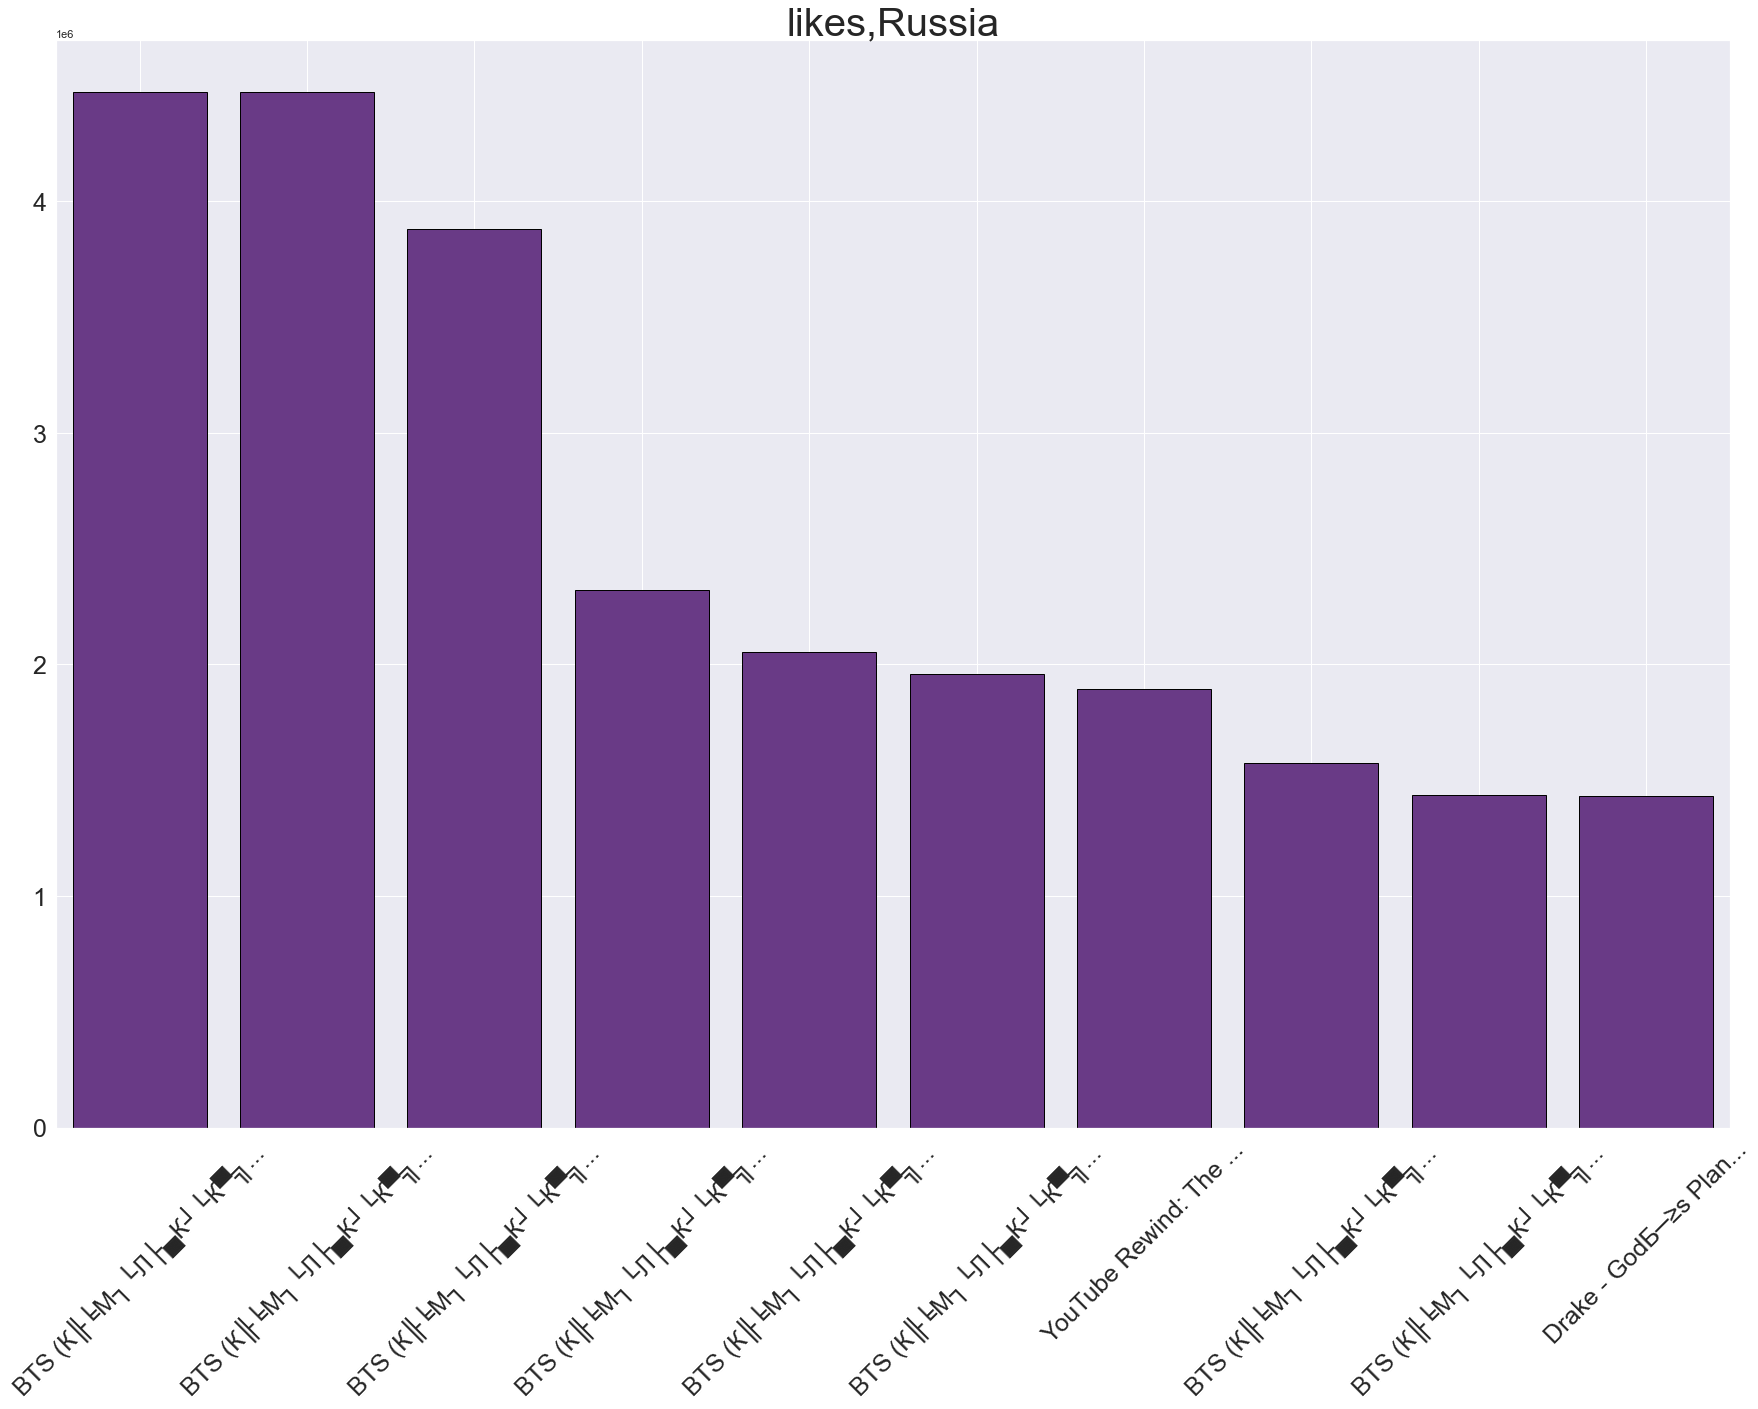

In [1224]:
visualize_for_video(data_RU, 'likes', 'Russia')

<class 'matplotlib.axes._subplots.AxesSubplot'>


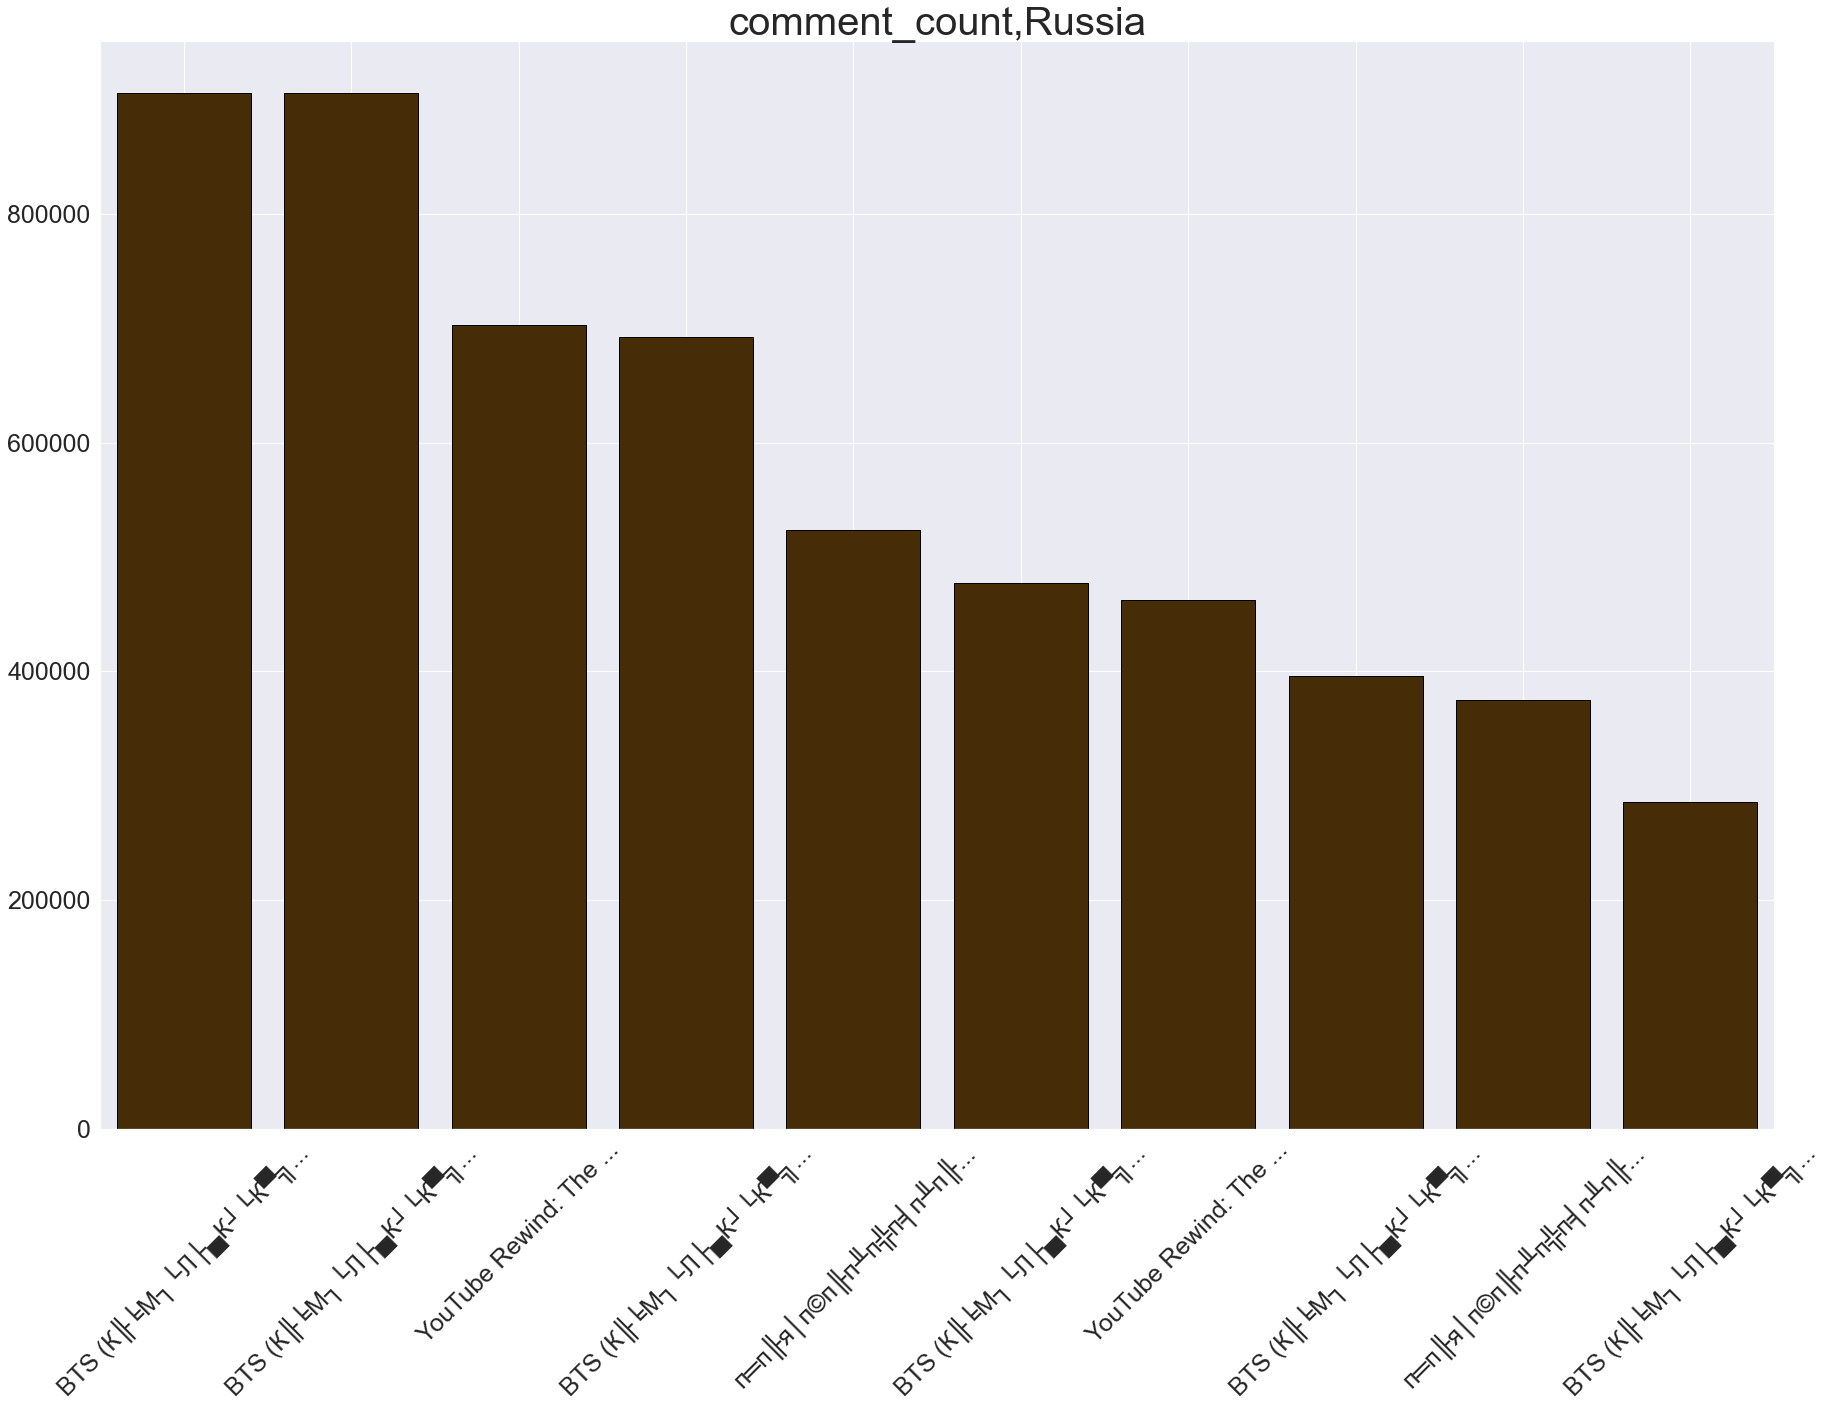

In [1225]:
visualize_for_video(data_RU, 'comment_count', 'Russia')

<class 'matplotlib.axes._subplots.AxesSubplot'>


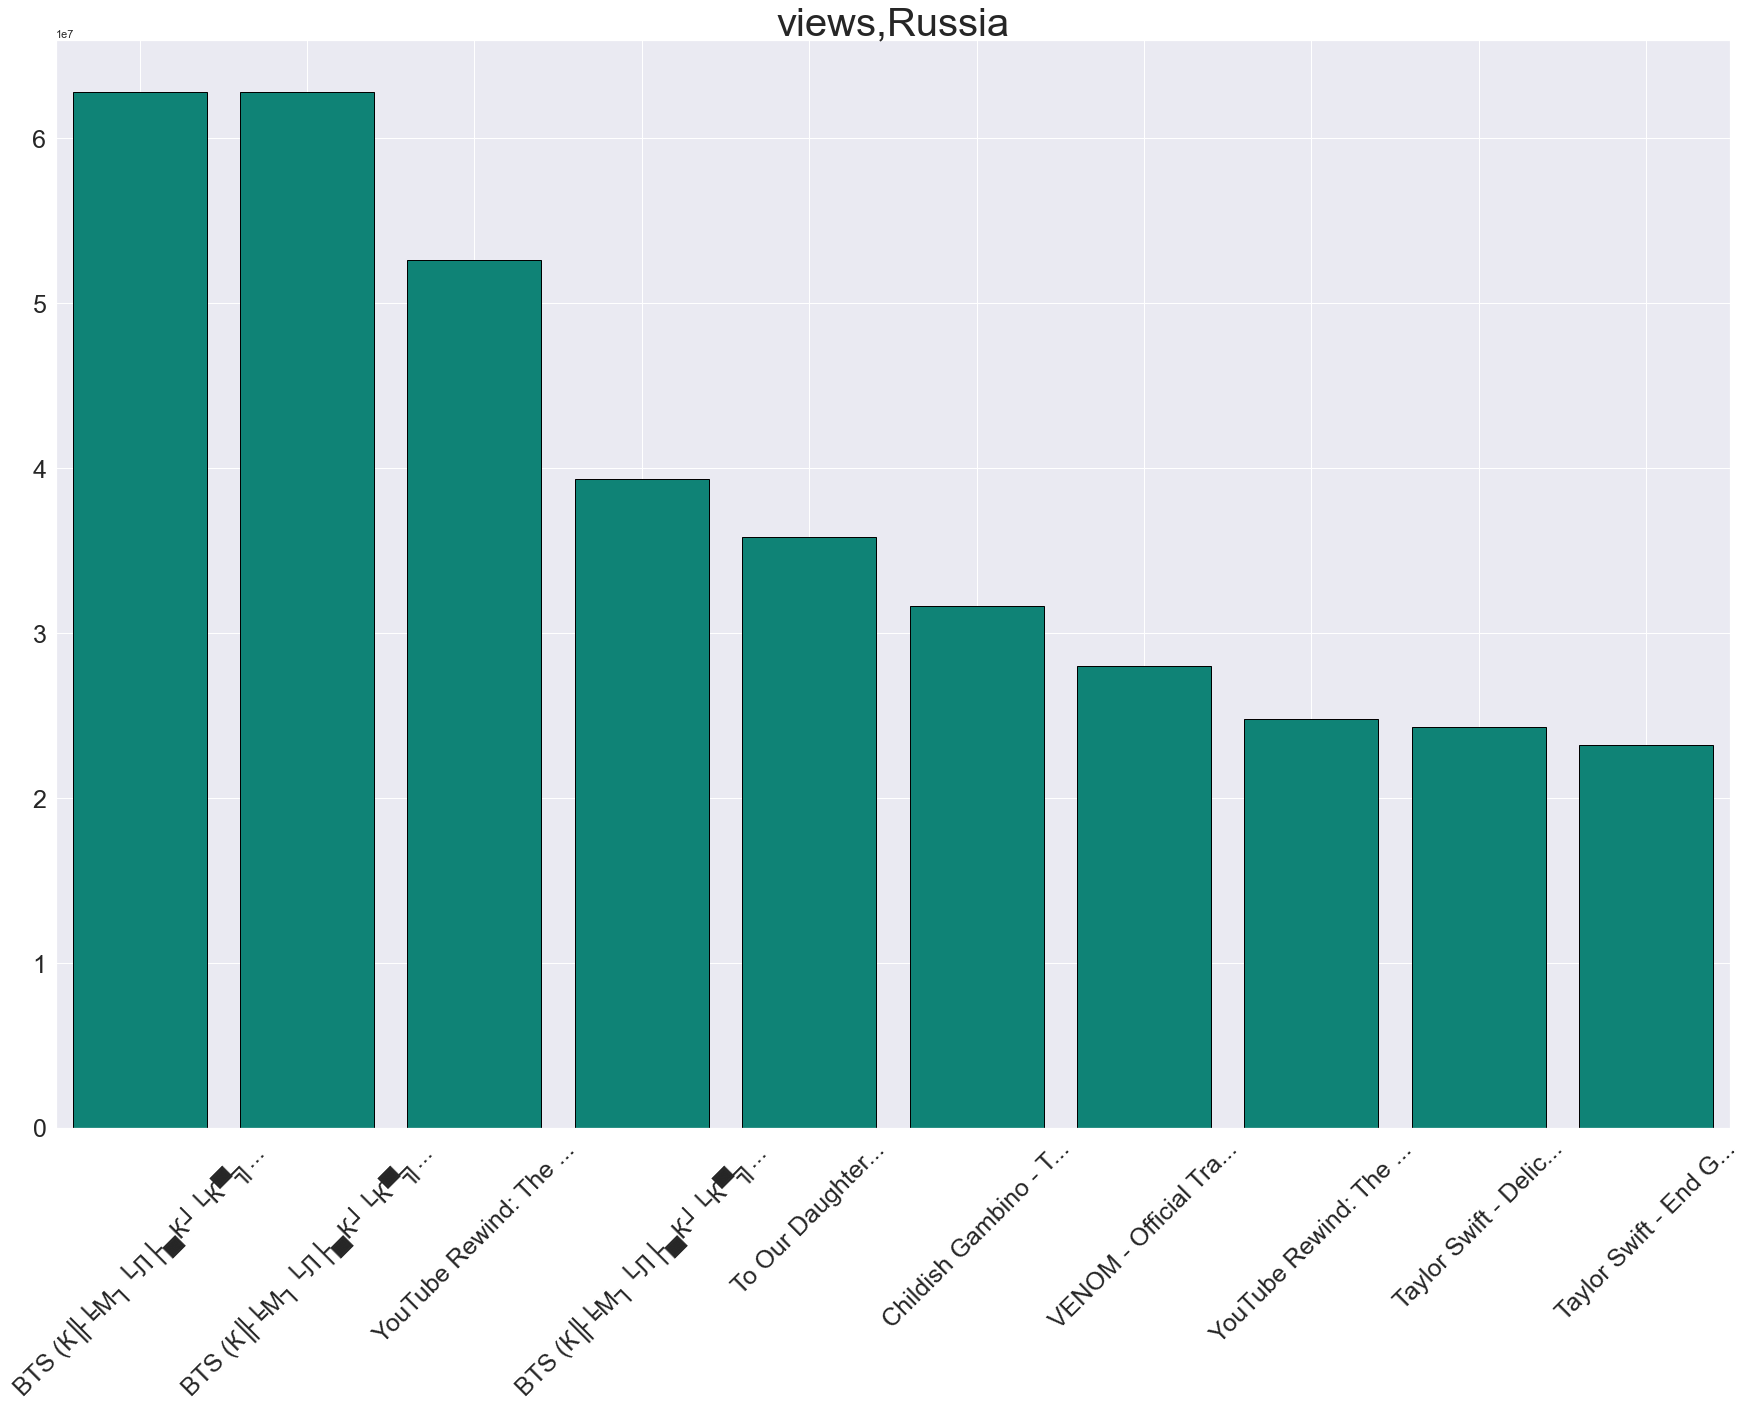

In [1226]:
visualize_for_video(data_RU, 'views', 'Russia')

<class 'matplotlib.axes._subplots.AxesSubplot'>


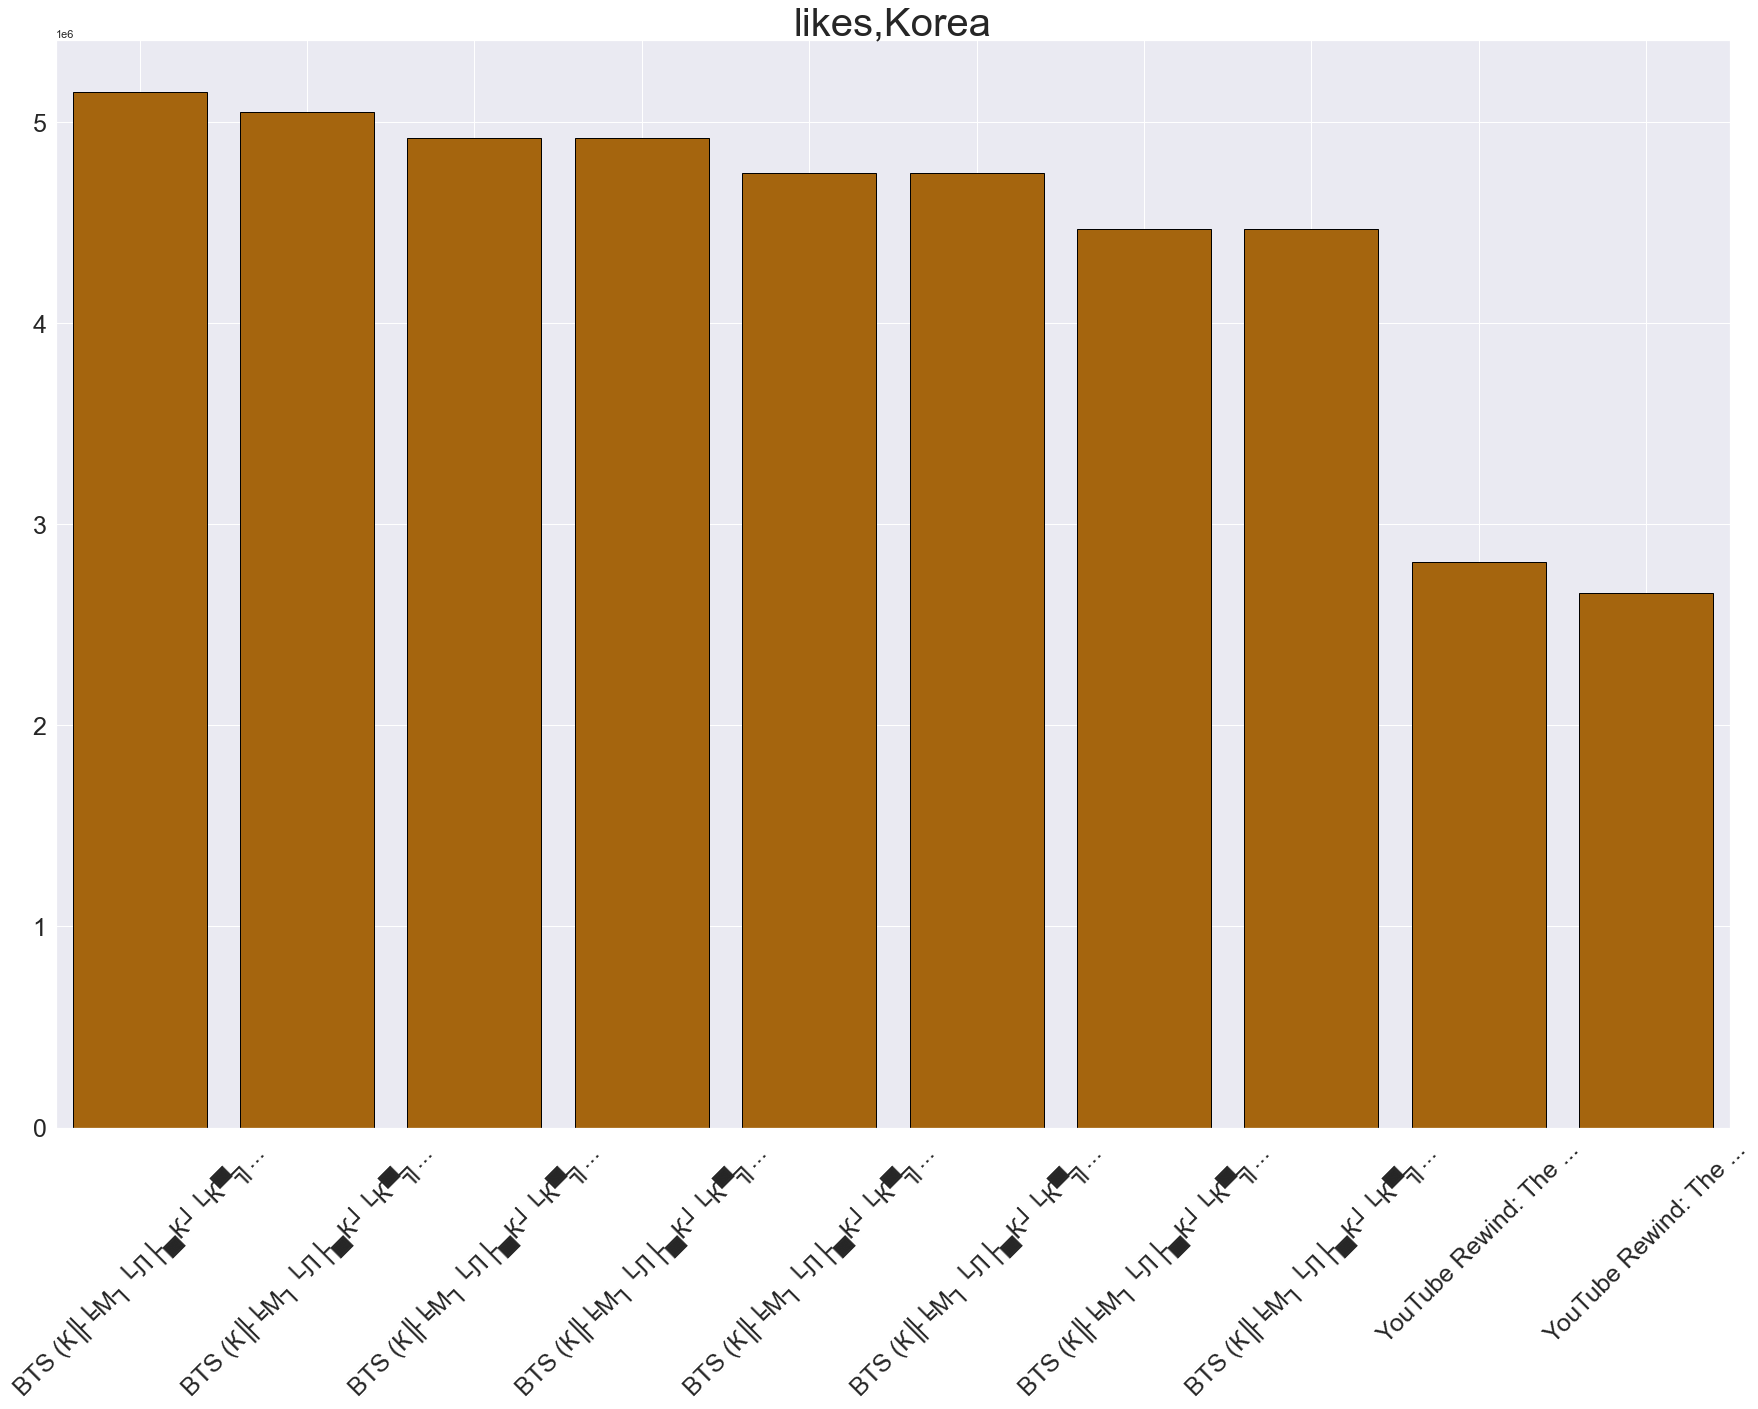

In [1227]:
visualize_for_video(data_KR, 'likes', 'Korea')

##### Есть ли зависимость?

<AxesSubplot:>

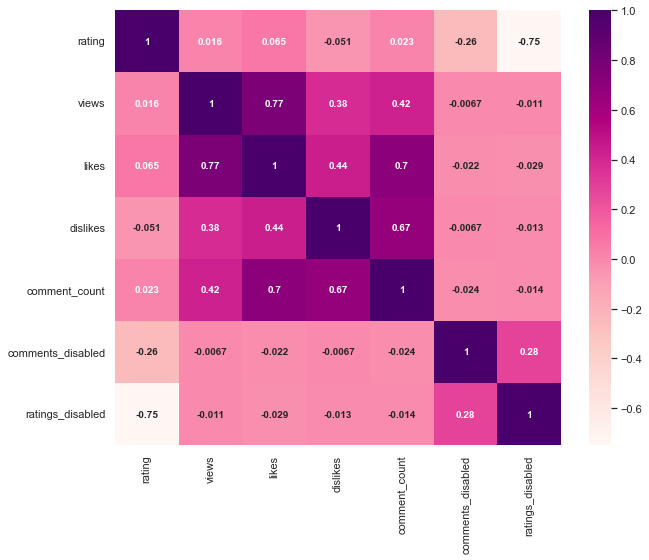

In [1228]:
data_useful = data_no_duplicates.copy() 
data_useful.drop(['category_id', 'days_different', 'video_error_or_removed'], inplace=True, axis=1)

corr =data_useful.corr()
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            annot = True,
            cmap="RdPu",
            annot_kws={"weight":"bold"})

Наблюдается зависимость между лайками и просмотрами; лайками, дизлайками и количеством комментариев. Есть отрицательня корреляция между рейтингом и скрытостью рейтинга.
Также ожидалось, что между закрытостью комментариев / скрытностью рейтинга и количеством дизлайков будет сильная взаимосвязь, но вопреки ожиданиям, случайные величины независимы

#### Статистика по популярности жанров

Популярность по количеству видео:

Entertainment            53101
People & Blogs           26145
Music                    20976
News & Politics          18480
Comedy                   13273
Sports                   11599
Film & Animation         10516
Howto & Style             9328
Gaming                    5749
Education                 3946
Science & Technology      3919
Autos & Vehicles          2303
Pets & Animals            2210
Nonprofits & Activism     1357
Travel & Events            897
Shows                      462
Movies                      26
Name: genre, dtype: int64


[Text(0, 0, 'Entertainment'),
 Text(1, 0, 'People & Blogs'),
 Text(2, 0, 'Music'),
 Text(3, 0, 'News & Politics'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Sports'),
 Text(6, 0, 'Film & Animation'),
 Text(7, 0, 'Howto & Style'),
 Text(8, 0, 'Gaming'),
 Text(9, 0, 'Education'),
 Text(10, 0, 'Science & Technology'),
 Text(11, 0, 'Autos & Vehicles'),
 Text(12, 0, 'Pets & Animals'),
 Text(13, 0, 'Nonprofits & Activism'),
 Text(14, 0, 'Travel & Events'),
 Text(15, 0, 'Shows'),
 Text(16, 0, 'Movies')]

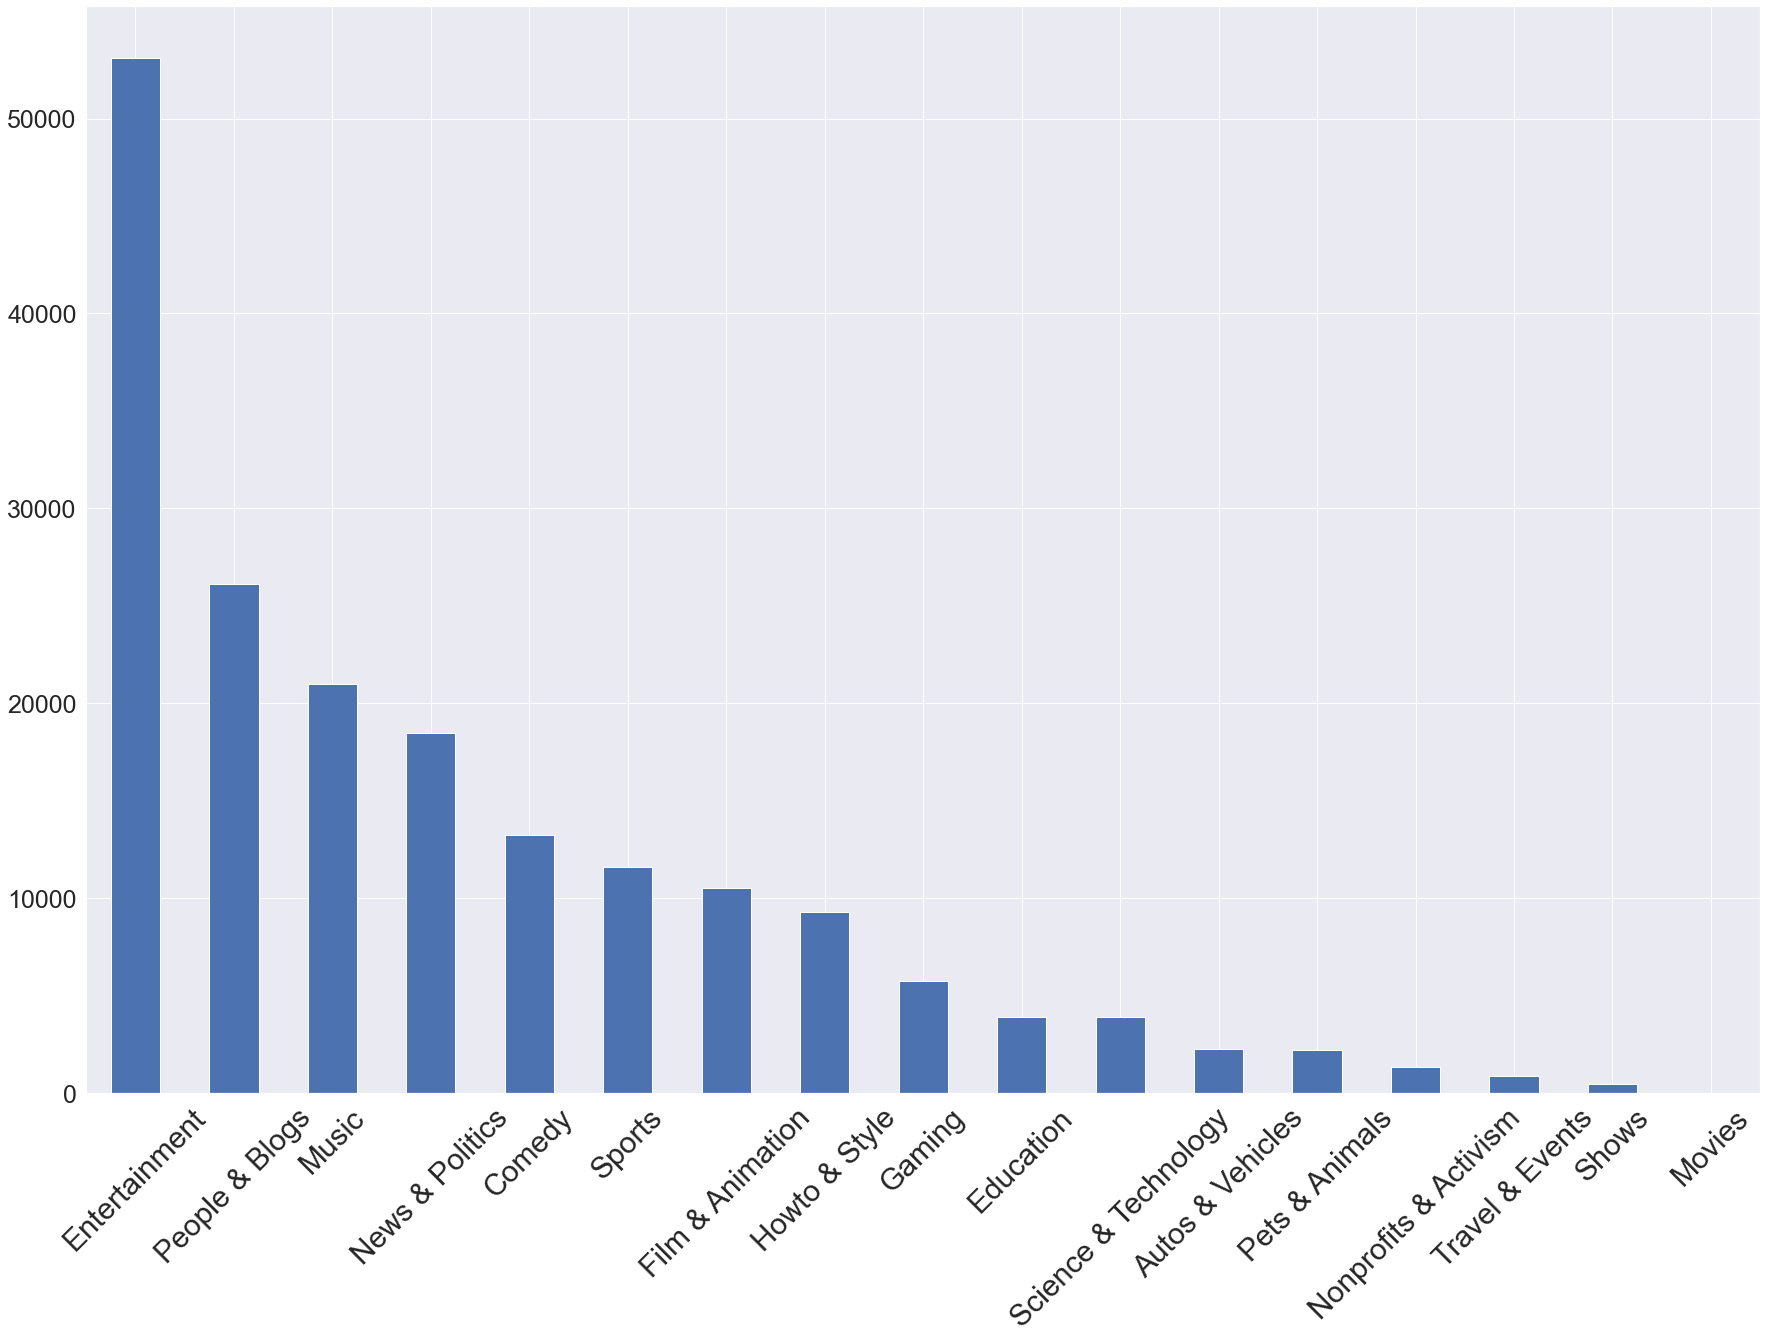

In [1229]:
category_count = data_no_duplicates['genre'].value_counts()
print(category_count)
ax = category_count.plot.bar(figsize=(30,20),fontsize=25)
ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=30)


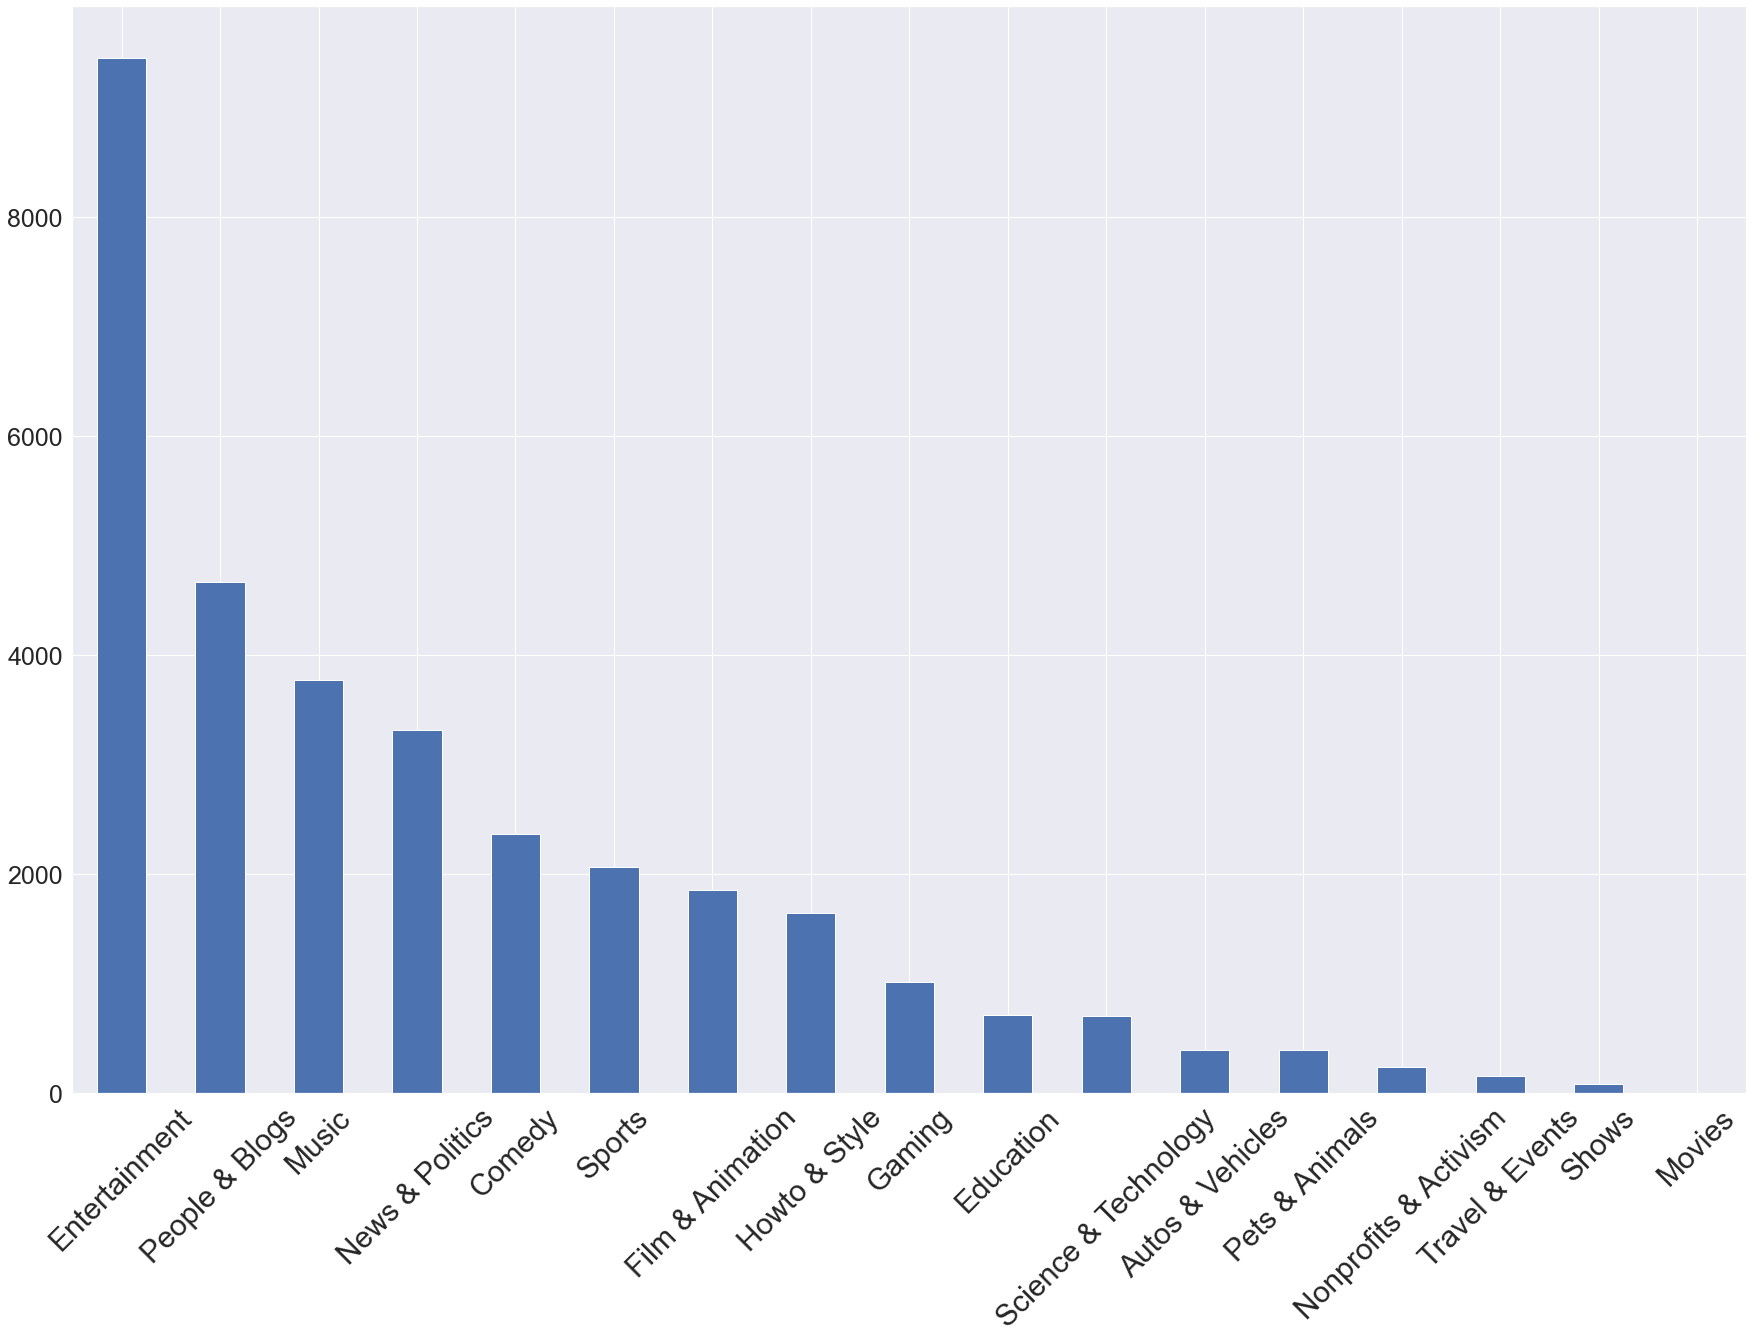

In [1230]:
def visualize_genre_stats(country):
    data_country = data_no_duplicates[data_no_duplicates['country'] == country]
    category_count = data_country['genre'].value_counts()
    ax = category_count.plot.bar(figsize=(30,20),fontsize=25)
    ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=30)
    
    
visualize_genre_stats('RU')

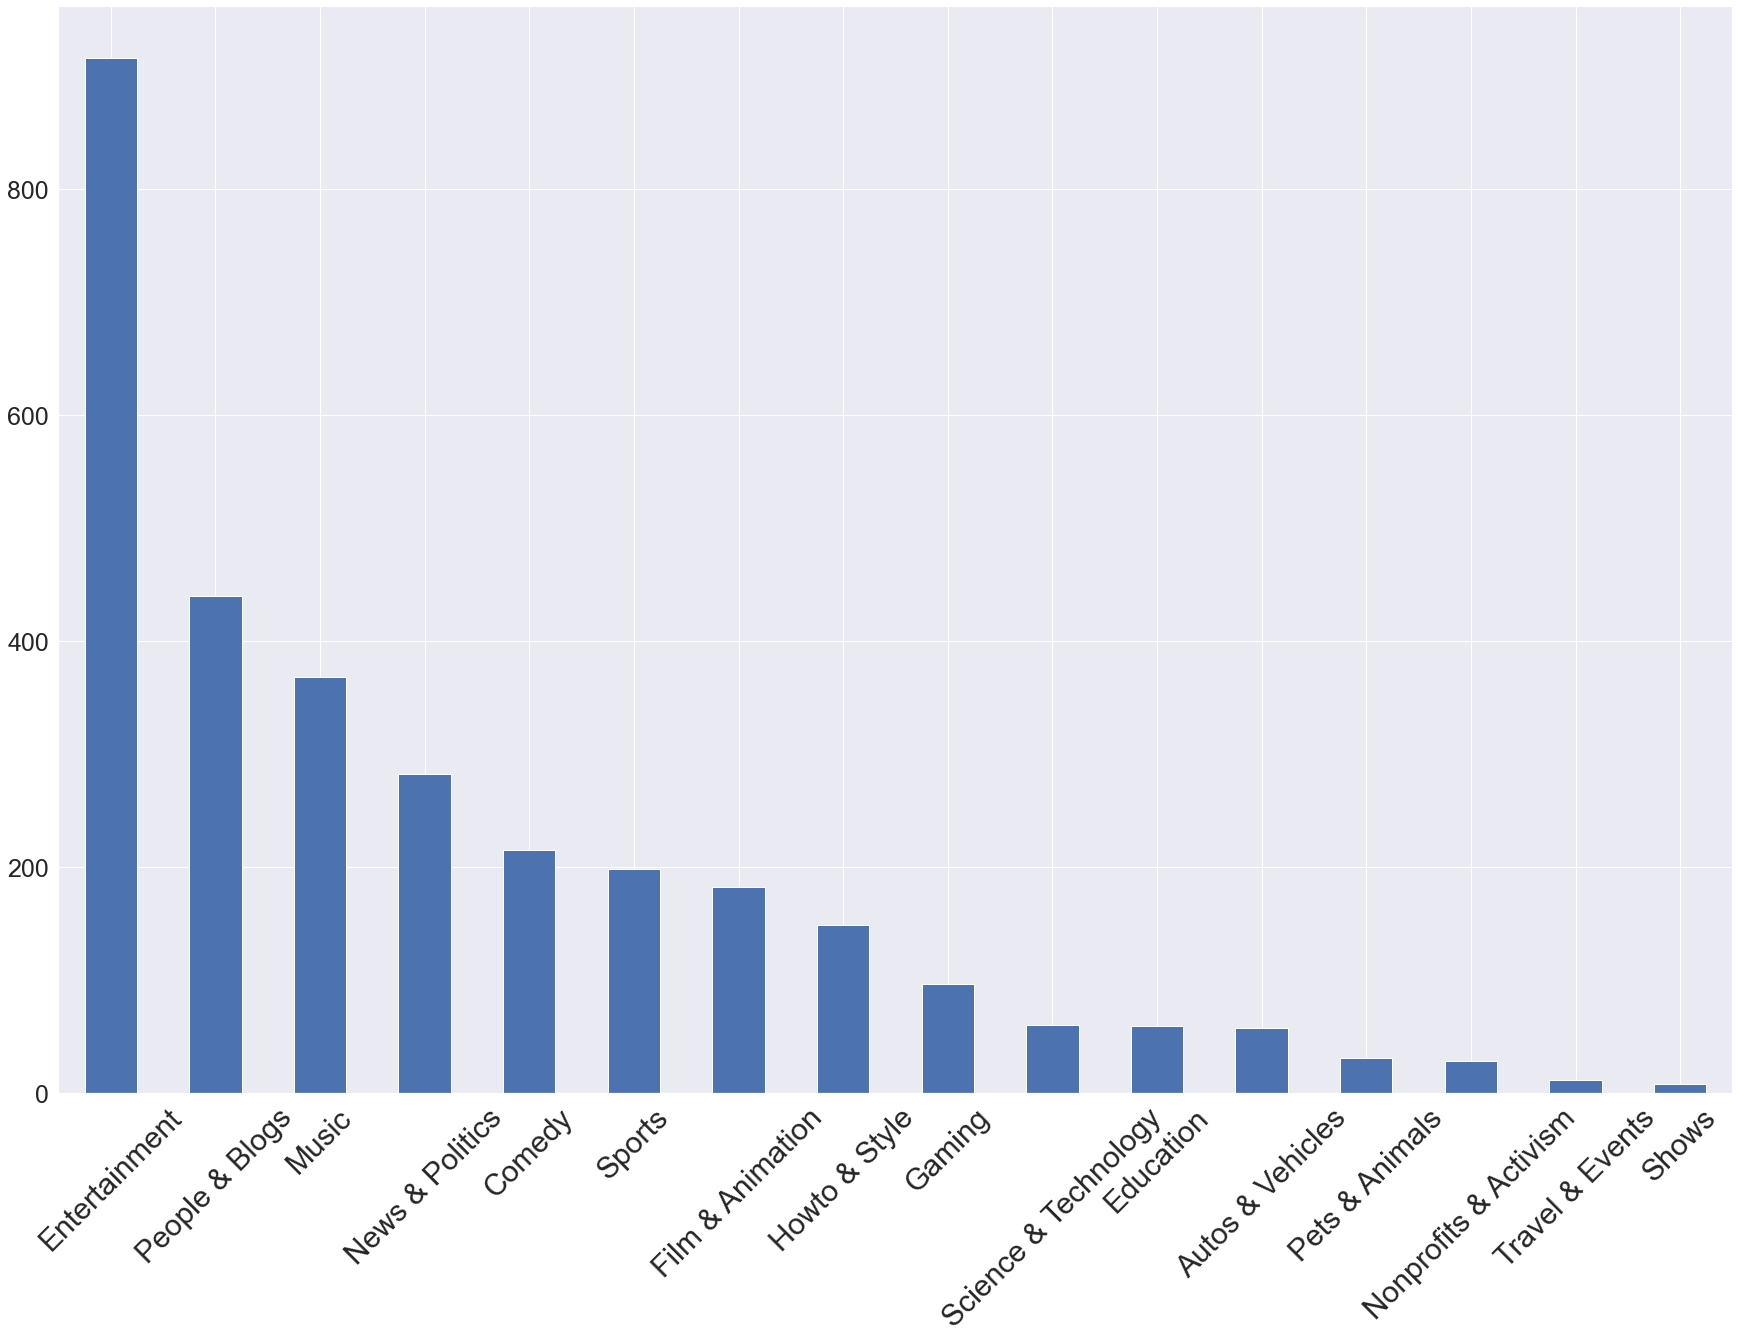

In [1231]:
visualize_genre_stats('GB')  

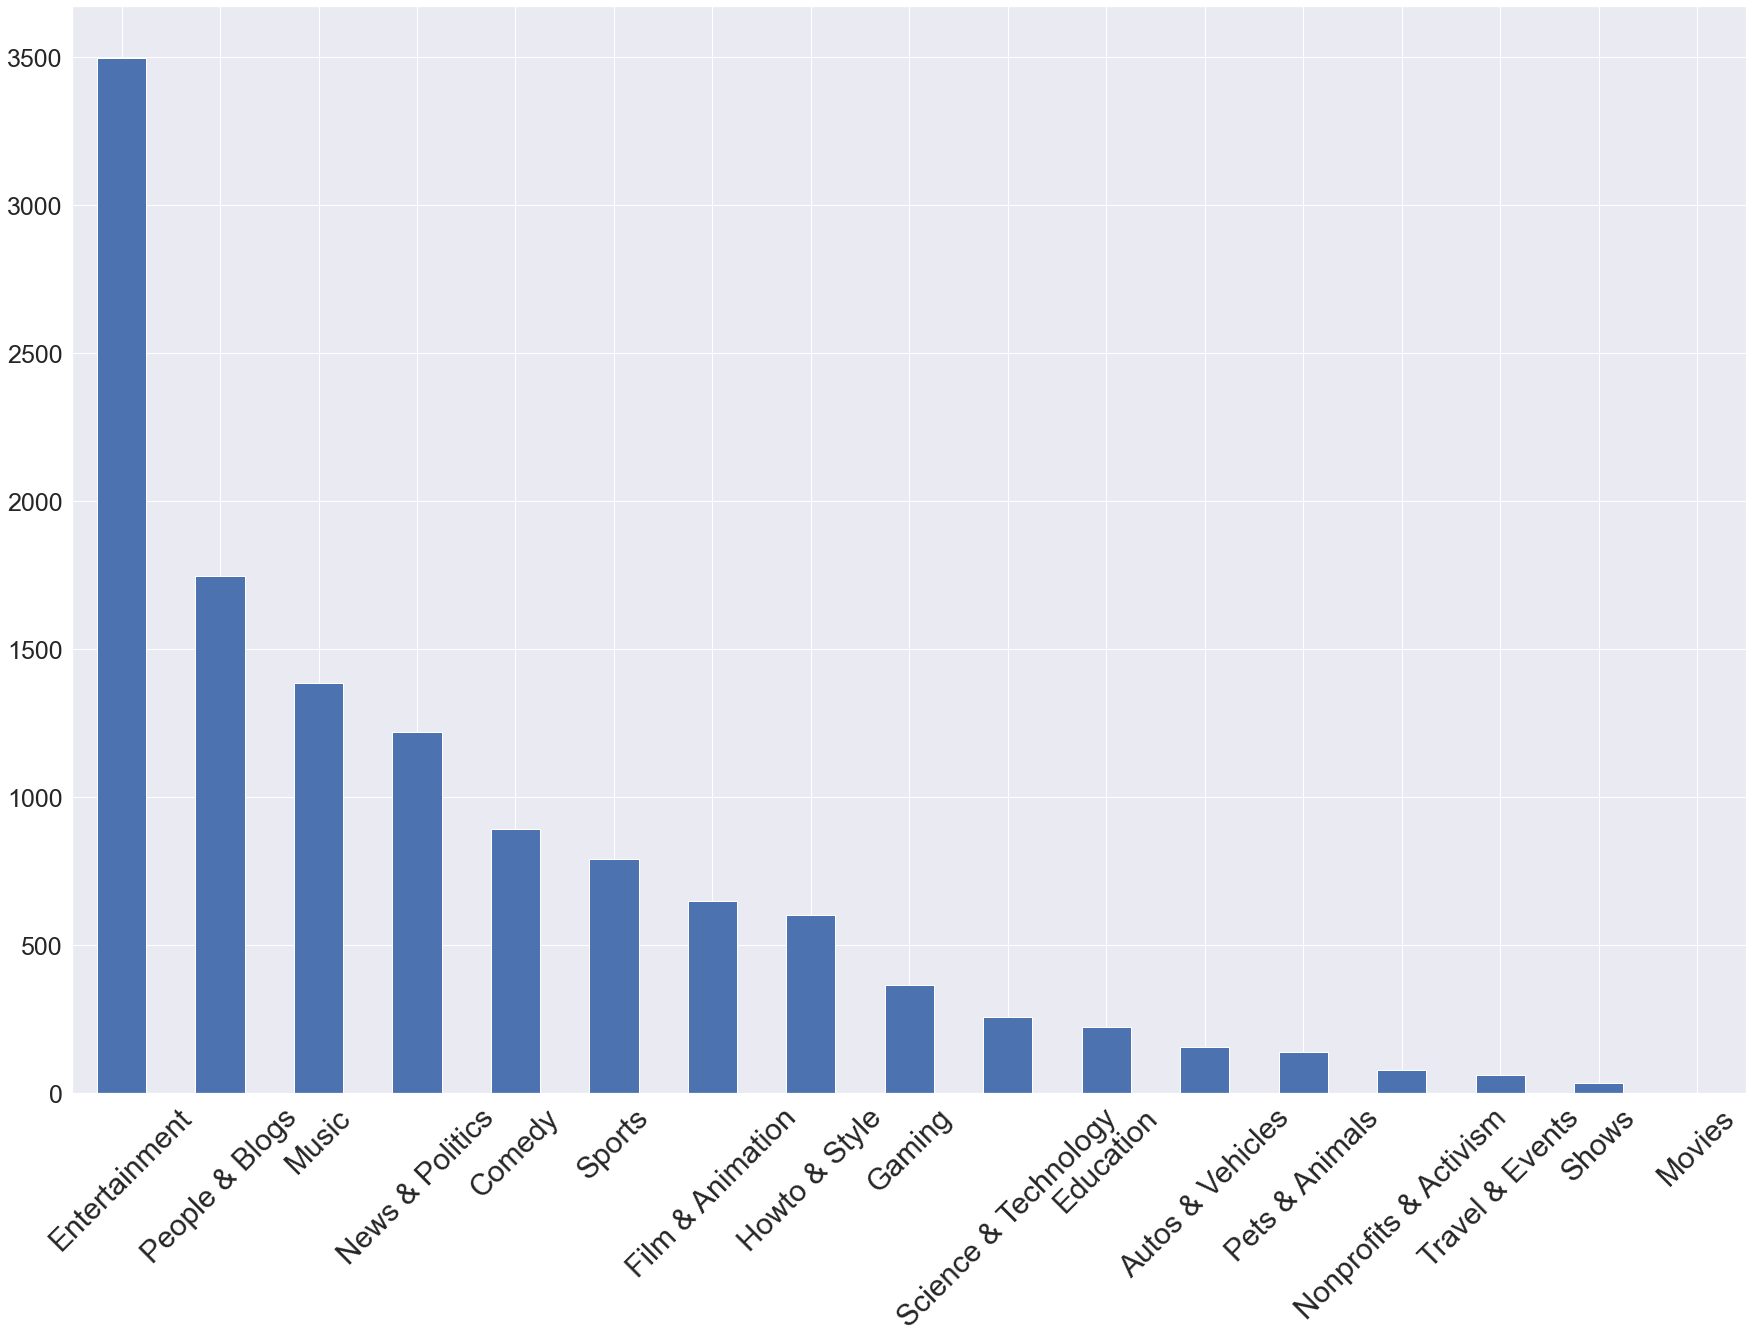

In [1232]:
visualize_genre_stats('JP')  

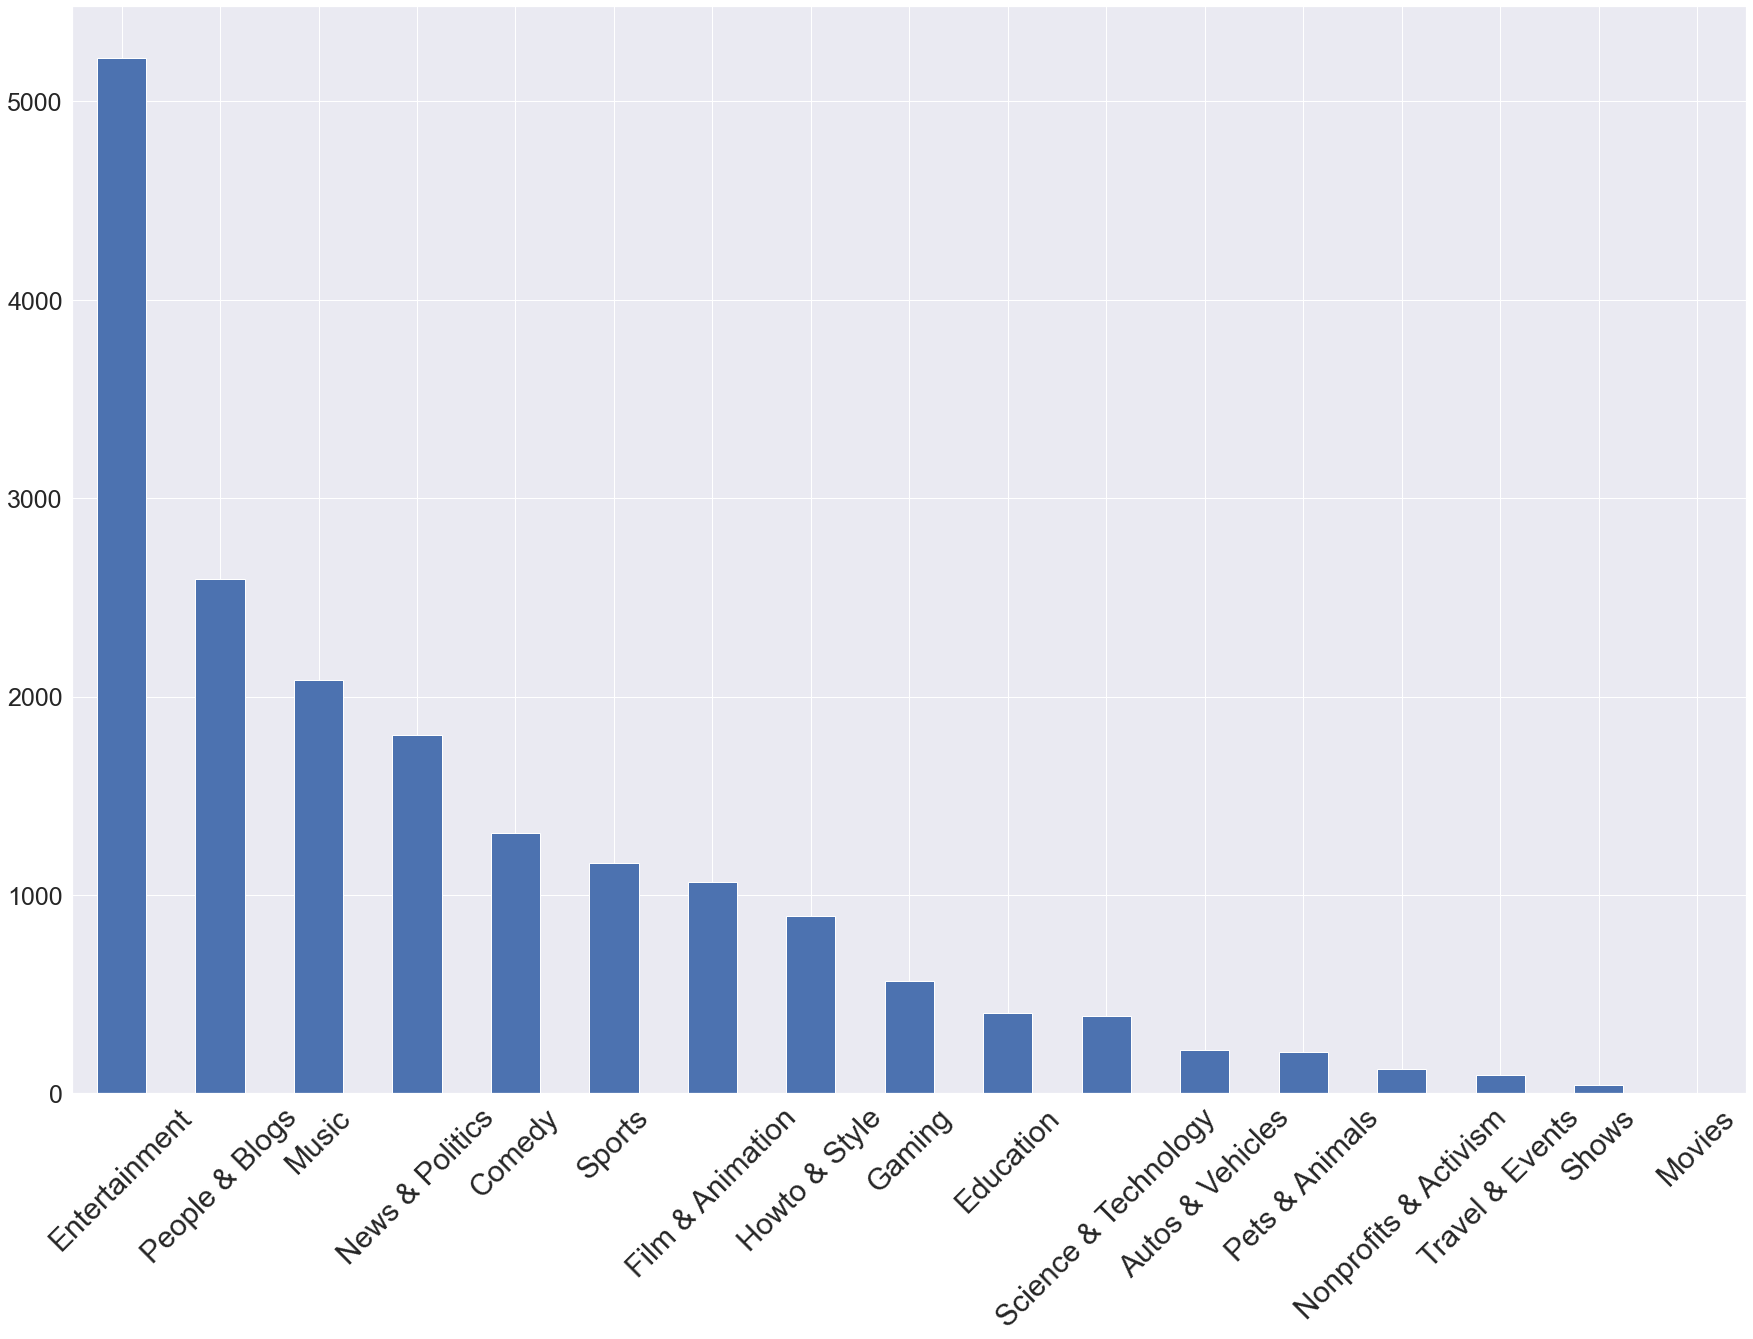

In [1233]:
visualize_genre_stats('CA')  

Алгоритмы Ютуба продвигают +- одни и те же жанры

##### Популярность жанров по различным параметрам:

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in double_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


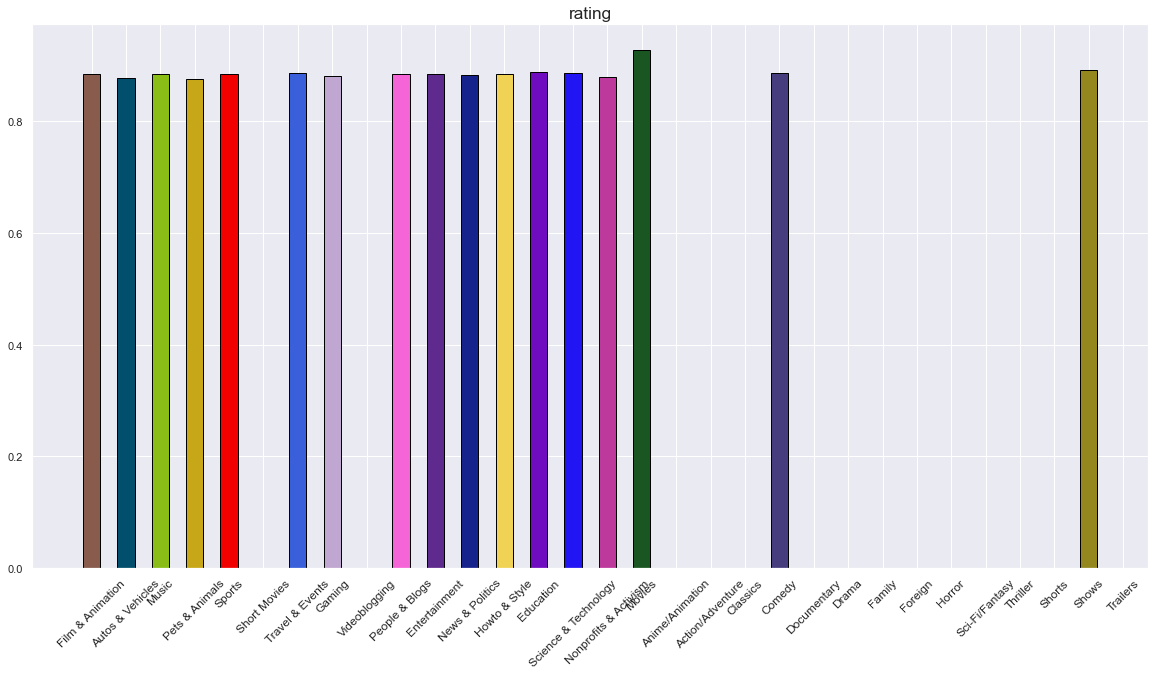

In [1234]:
# only 2 properties in properties_list
def visualize_genre_stats_different(df, properties_list: list, genre_list: list):
    
# calculate average
    stats_common = []
    for property in properties_list:
        stat = []
        for genre in genre_list:
            stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))           
        stats_common.append(stat)
        

# draw
    _, ax1 = plt.subplots(ncols=1,nrows=1, figsize=(20,10))

    index = np.arange(len(genre_list))
#     print(index)
    bar_width = 0.1
    opacity = 0.4

    def rdm():
        return (random.random(), random.random(), random.random())
    
    color_rdm = [rdm() for i in range(len(genre_list))]
    for j, ax in enumerate([ax1]):
        ax.bar(index, stats_common[j], bar_width * 5, color=color_rdm, edgecolor='black')
        ax.set_title(properties_list[j], fontsize ='xx-large')
        ax.set_xticks(index)
        ax.set_xticklabels(genre_list, fontsize ='large', rotation=45)
            

            
genre_list = ['Film & Animation','Autos & Vehicles','Music','Pets & Animals','Sports','Short Movies','Travel & Events',
 'Gaming', 'Videoblogging','People & Blogs', 'Entertainment', 'News & Politics','Howto & Style','Education', 'Science & Technology',
 'Nonprofits & Activism','Movies','Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama',
 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers'] 

properties_list = ['rating']
visualize_genre_stats_different(data_drop_bad_names, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


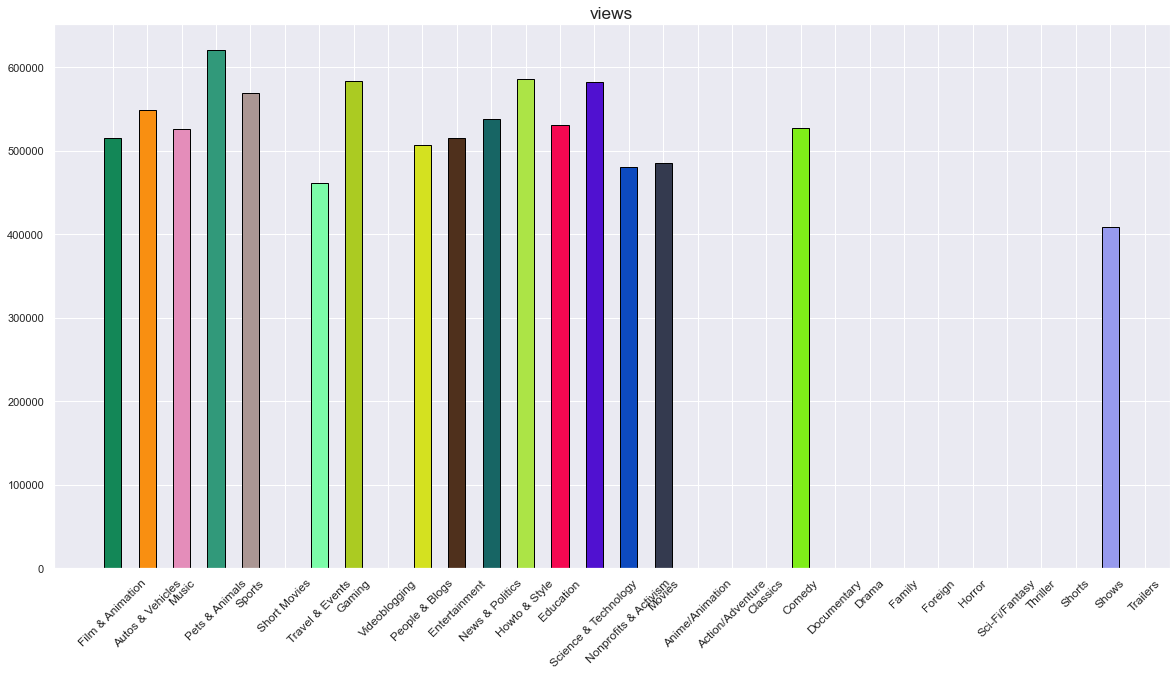

In [1235]:
properties_list = ['views']
visualize_genre_stats_different(data_drop_bad_names, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


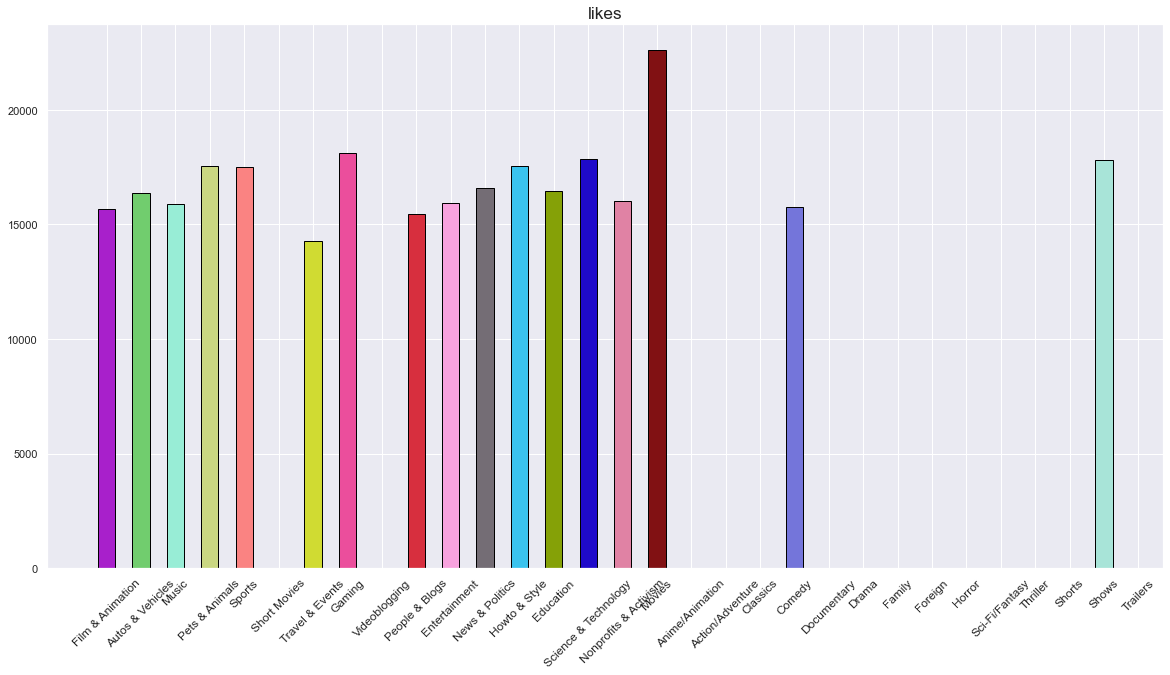

In [1236]:
properties_list = ['likes']
visualize_genre_stats_different(data_drop_bad_names, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


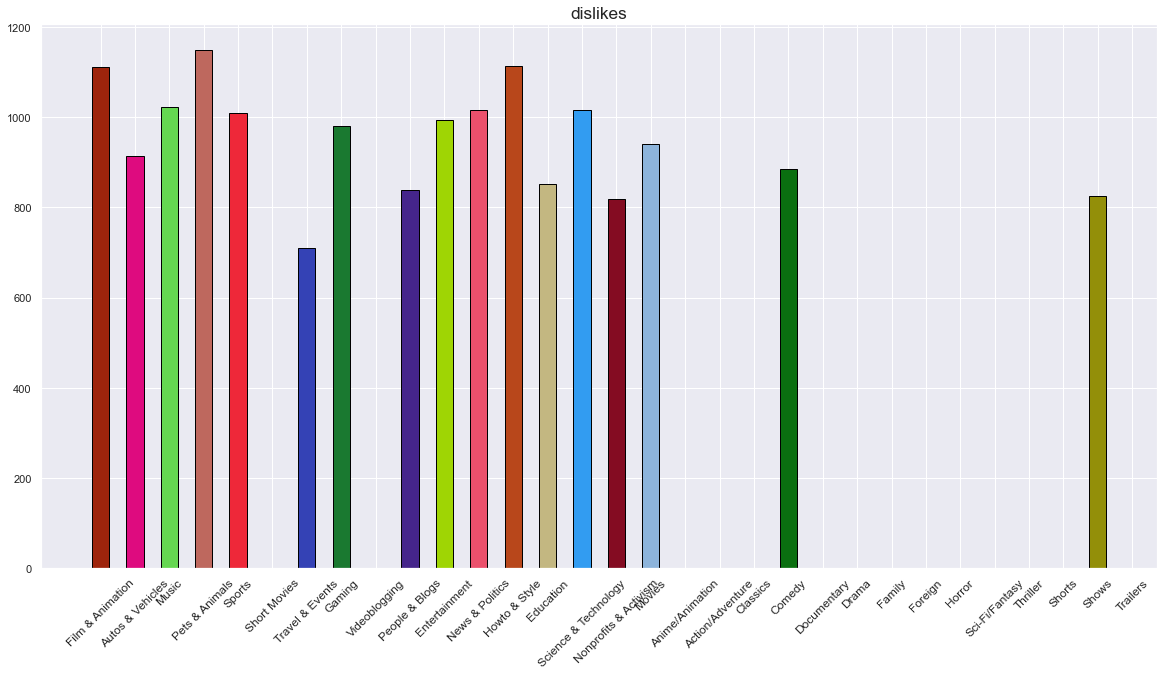

In [1237]:
properties_list = ['dislikes']
visualize_genre_stats_different(data_drop_bad_names, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


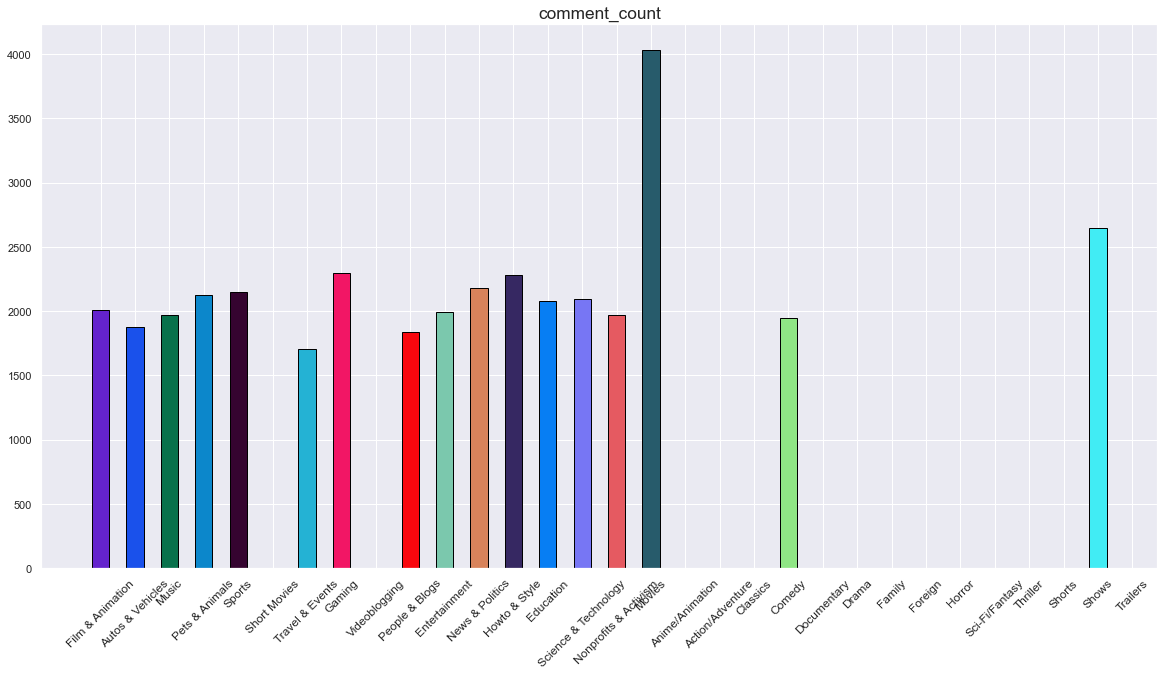

In [1238]:
properties_list = ['comment_count']
visualize_genre_stats_different(data_drop_bad_names, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


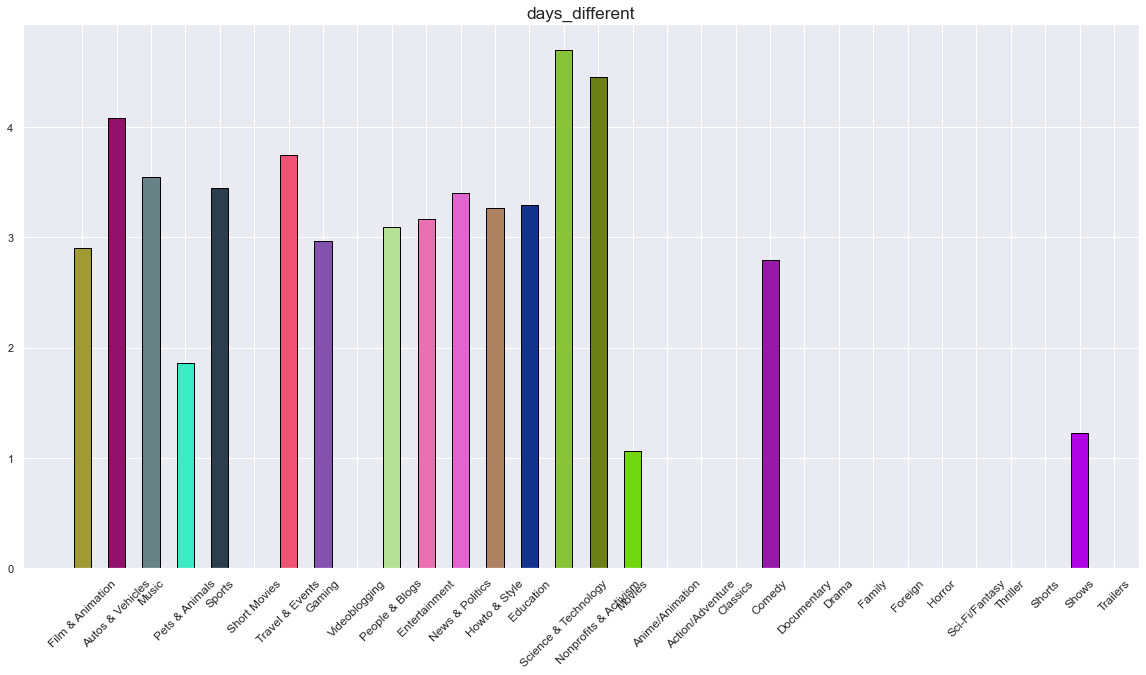

In [1239]:
properties_list = ['days_different']  
visualize_genre_stats_different(data_first_appearance, properties_list, genre_list)

Статистика по странам

In [1240]:
data_RU.insert(len(data_RU.columns), 'genre', pd.Series(id_dict[str(i)] for i in data_RU['category_id']))
data_MX.insert(len(data_MX.columns), 'genre', pd.Series(id_dict[str(i)] for i in data_MX['category_id']))
data_KR.insert(len(data_KR.columns), 'genre', pd.Series(id_dict[str(i)] for i in data_KR['category_id']))
data_JP.insert(len(data_JP.columns), 'genre', pd.Series(id_dict[str(i)] for i in data_JP['category_id']))
data_US.insert(len(data_US.columns), 'genre', pd.Series(id_dict[str(i)] for i in data_US['category_id']))
data_GB.insert(len(data_GB.columns), 'genre', pd.Series(id_dict[str(i)] for i in data_GB['category_id']))

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


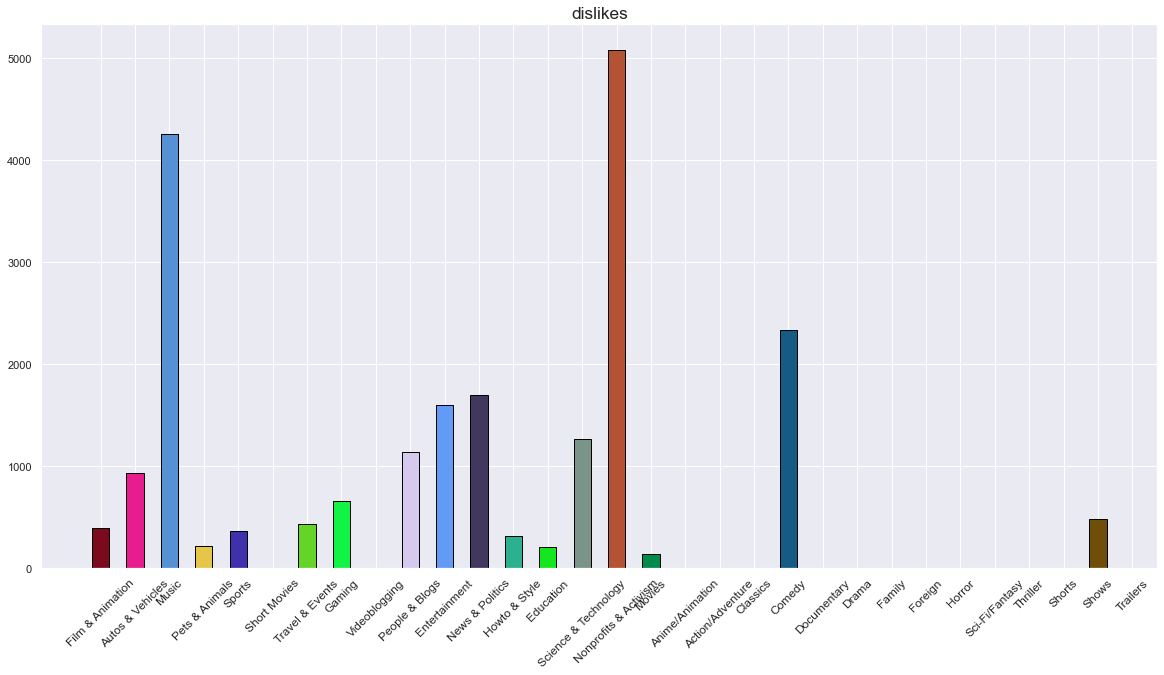

In [1241]:
properties_list = ['dislikes']
visualize_genre_stats_different(data_RU, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


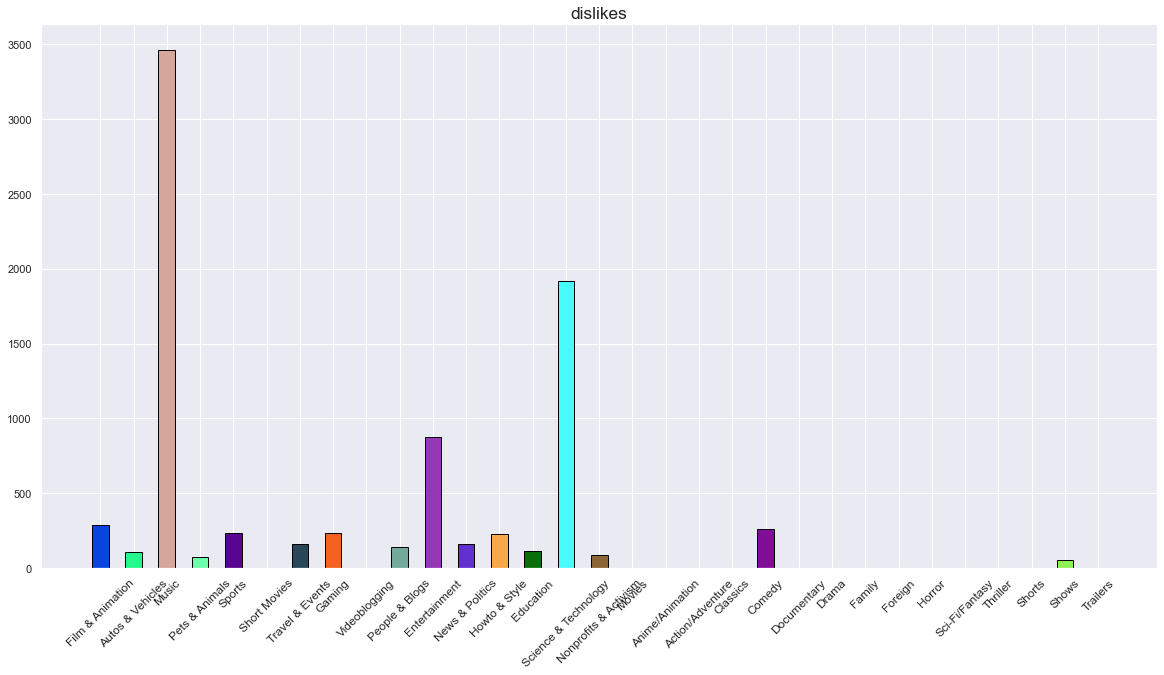

In [1242]:
properties_list = ['dislikes']
visualize_genre_stats_different(data_KR, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


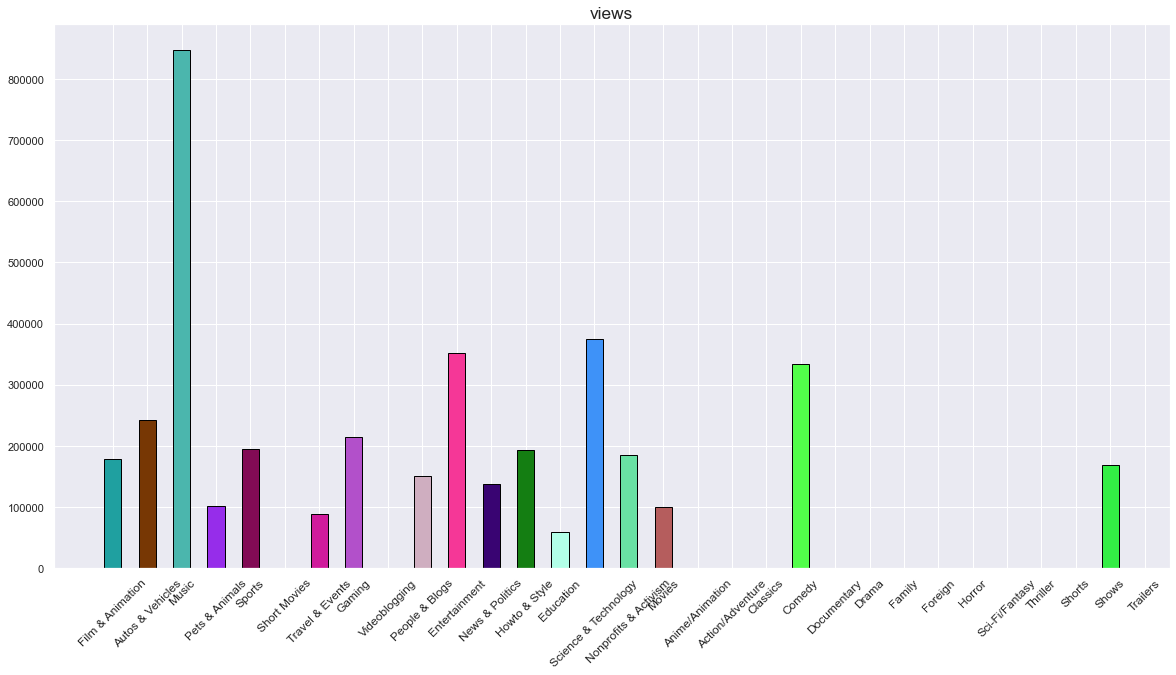

In [1243]:
properties_list = ['views']
visualize_genre_stats_different(data_RU, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


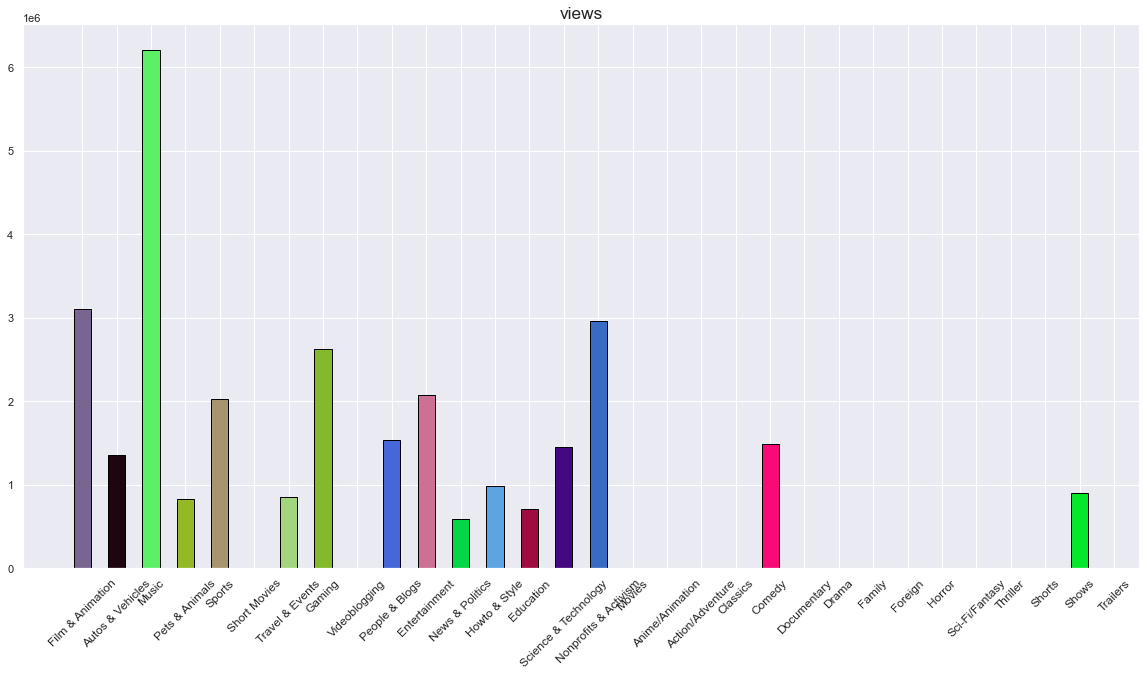

In [1244]:
properties_list = ['views']
visualize_genre_stats_different(data_US, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


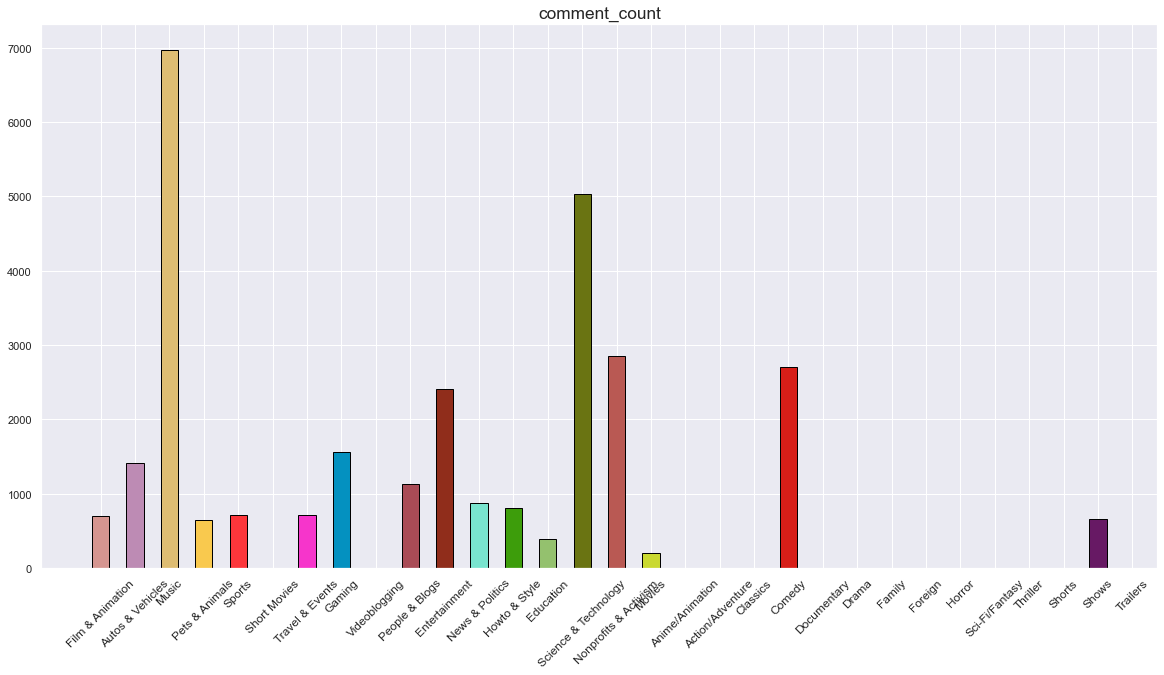

In [1245]:
properties_list = ['comment_count']
visualize_genre_stats_different(data_RU, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


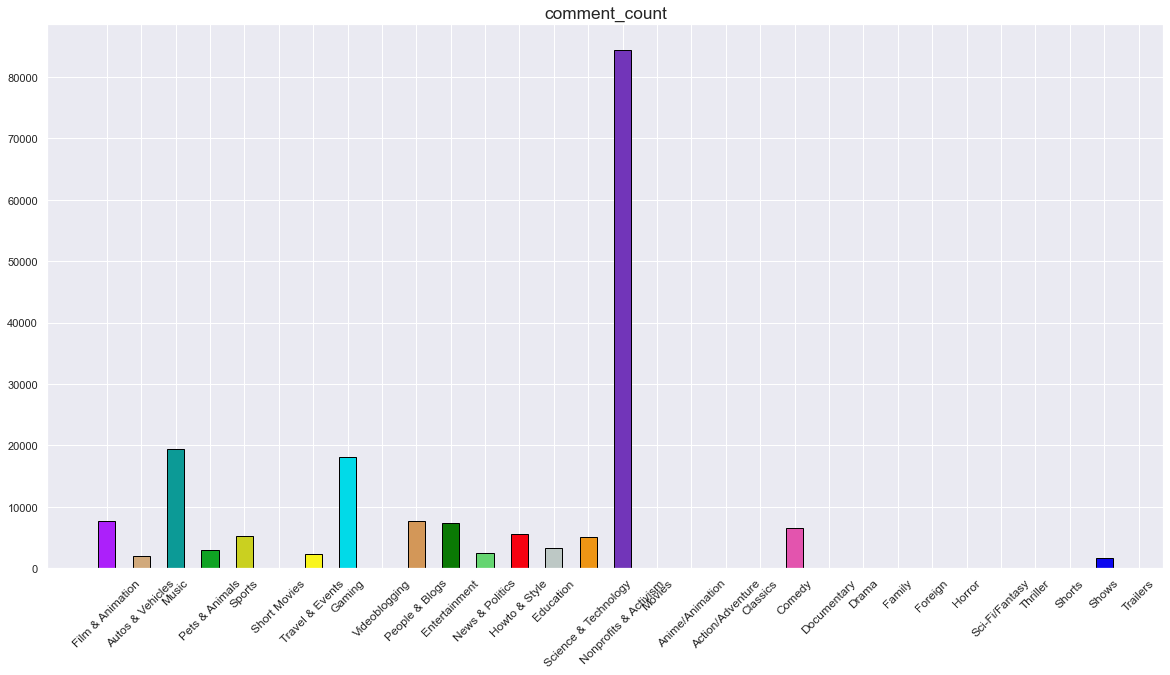

In [1246]:
properties_list = ['comment_count']
visualize_genre_stats_different(data_US, properties_list, genre_list)

<ipython-input-1234-a54ed5849599>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  stat.append(df[df['genre']== genre][property].agg('sum')/len(df[df['genre']== genre]))


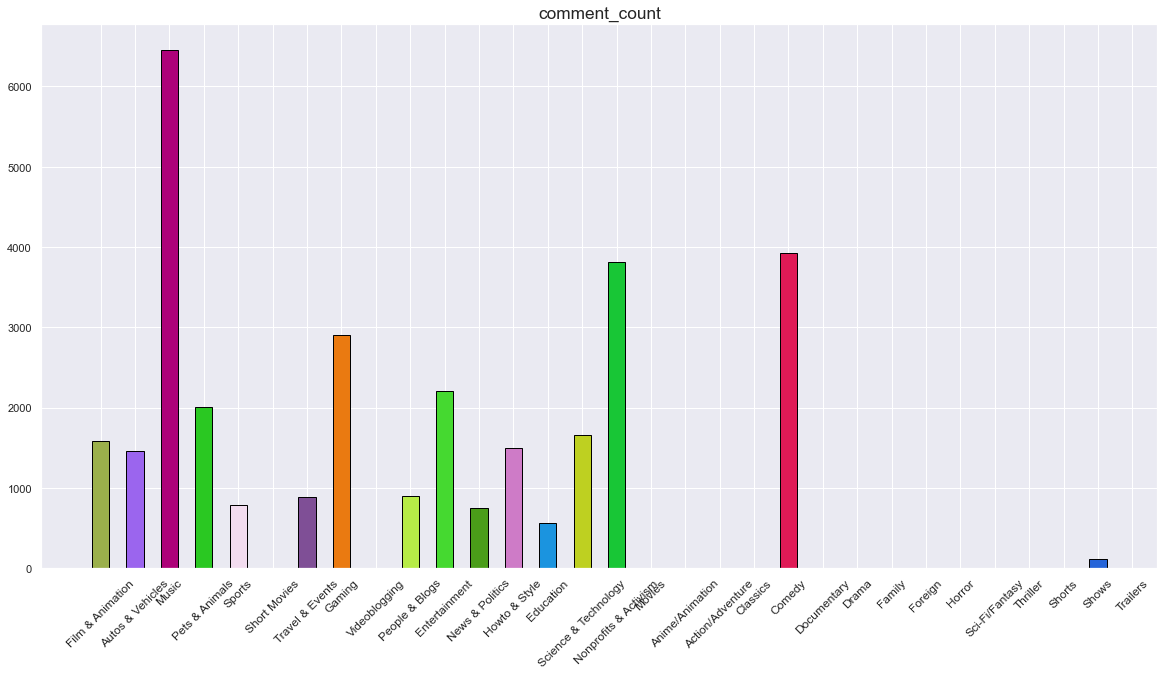

In [1247]:
properties_list = ['comment_count']
visualize_genre_stats_different(data_MX, properties_list, genre_list)

#### Когда лучше всего выкладывать видео?

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


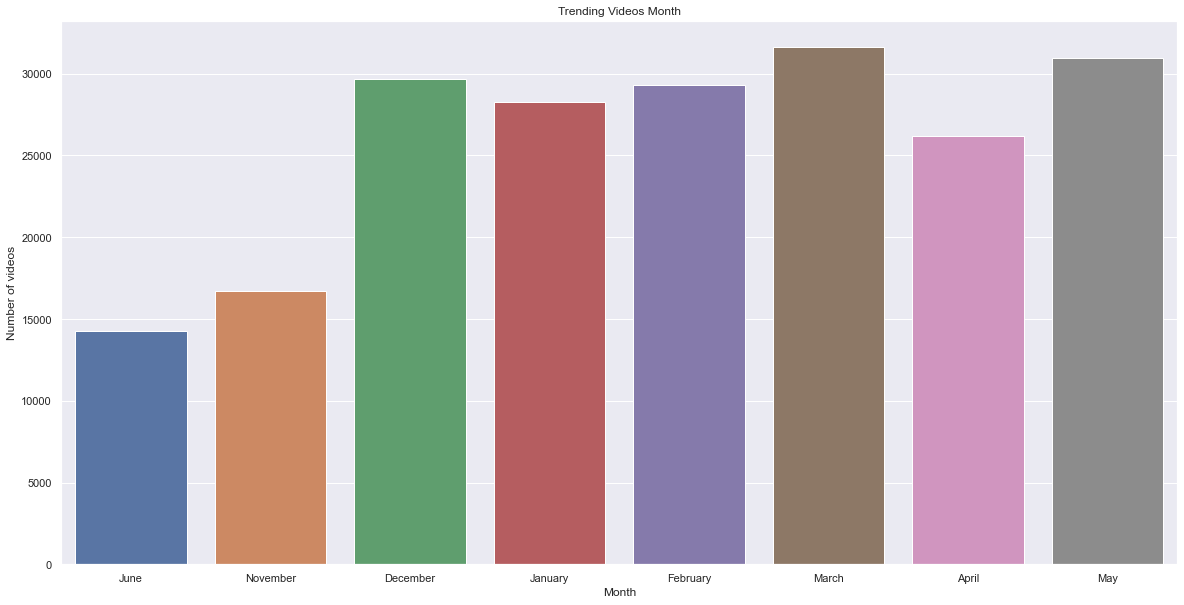

March       31659
May         30986
December    29687
February    29330
January     28294
April       26165
November    16707
June        14295
Name: month, dtype: int64


In [1248]:
import calendar
df_m = data_drop_bad_names.copy()
df_m['month'] = data_drop_bad_names['trending_date'].dt.month
df_m['month'] = df_m['month'].apply(lambda x: calendar.month_name[x])


plt.figure(figsize=(20,10))
index = np.arange(8)

sns.countplot(df_m['month'])
plt.title('Trending Videos Month')
plt.xlabel('Month')
plt.ylabel('Number of videos')
plt.show()


print(df_m['month'].value_counts())

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


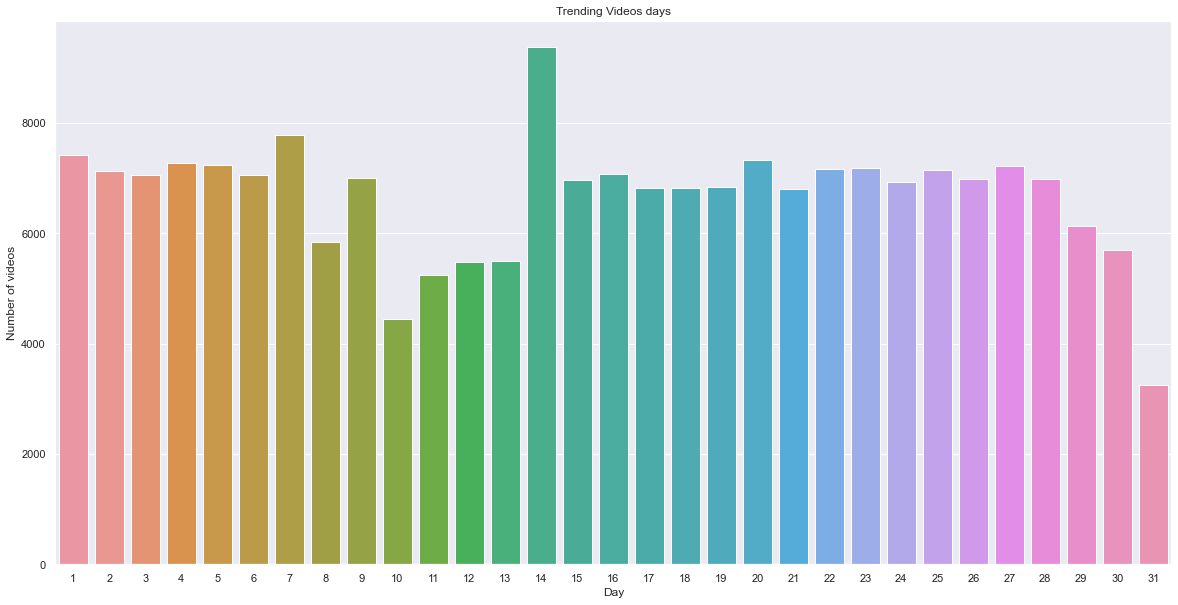

14    9379
7     7781
1     7419
20    7331
4     7264
5     7231
27    7224
23    7187
22    7160
25    7143
2     7130
16    7078
6     7051
3     7045
9     7003
26    6988
28    6986
15    6957
24    6931
19    6844
18    6818
17    6816
21    6796
29    6135
8     5847
30    5688
13    5486
12    5468
11    5250
10    4447
31    3240
Name: day, dtype: int64


In [1249]:
import calendar
df_d = data_drop_bad_names.copy()
df_d['day'] = data_drop_bad_names['trending_date'].dt.day

plt.figure(figsize=(20,10))
index = np.arange(8)

sns.countplot(df_d['day'])
plt.title('Trending Videos days')
plt.xlabel('Day')
plt.ylabel('Number of videos')
plt.show()


print(df_d['day'].value_counts())

In [1250]:
data_drop_bad_names.dtypes

rating                           float64
video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_date              datetime64[ns]
publish_time                      object
days_different                     int64
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
genre                             object
dtype: object

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


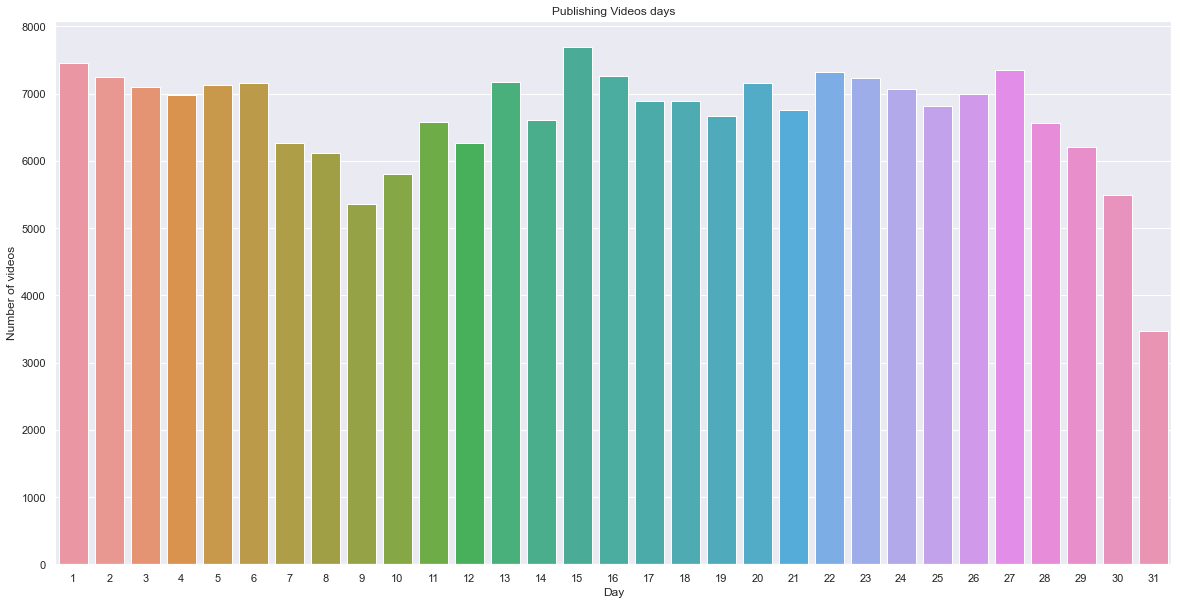

15    7700
1     7461
27    7348
22    7328
16    7265
2     7250
23    7237
13    7176
6     7164
20    7157
5     7136
3     7104
24    7065
26    7001
4     6974
17    6891
18    6889
25    6818
21    6759
19    6665
14    6604
11    6580
28    6560
7     6271
12    6259
29    6208
8     6121
10    5812
30    5489
9     5360
31    3471
Name: day, dtype: int64


In [1251]:
df_pd = data_drop_bad_names.copy()
df_pd['day'] = data_drop_bad_names['publish_date'].dt.day
plt.figure(figsize=(20,10))
sns.countplot(df_pd['day'])
plt.title('Publishing Videos days')
plt.xlabel('Day')
plt.ylabel('Number of videos')
plt.show()

print(df_pd['day'].value_counts())

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


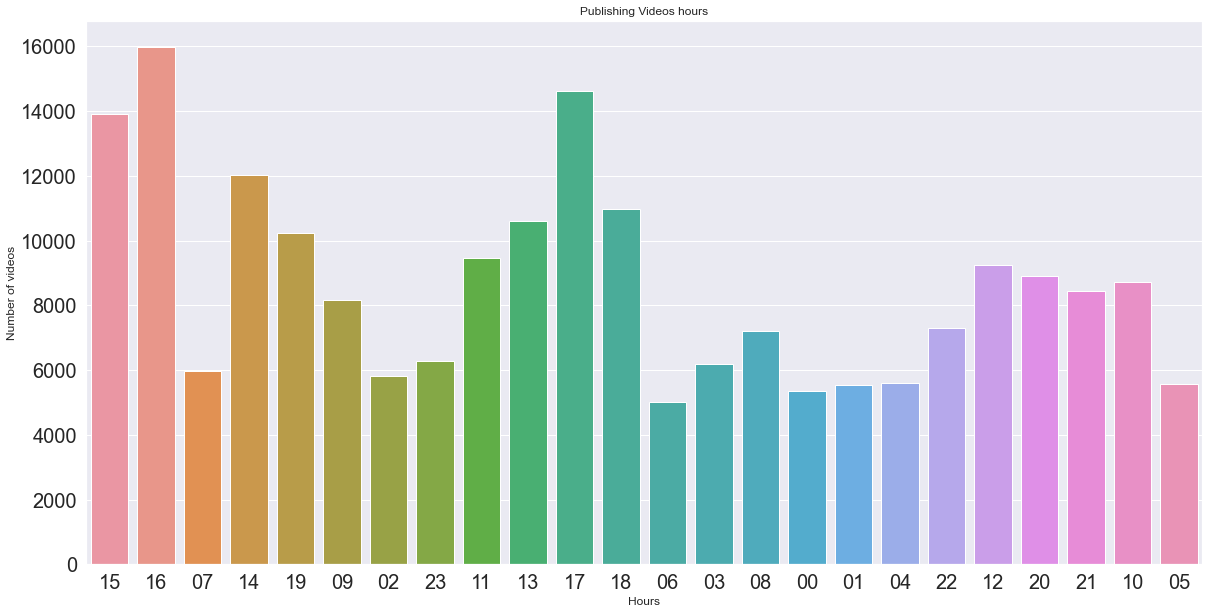

16    15991
17    14604
15    13920
14    12037
18    10959
13    10595
19    10225
11     9454
12     9235
20     8901
10     8721
21     8440
09     8174
22     7300
08     7220
23     6269
03     6192
07     5985
02     5805
04     5601
05     5584
01     5539
00     5359
06     5013
Name: hour, dtype: int64


In [1252]:
df_hour = data_drop_bad_names.copy()
df_hour['publish_time'] = df_hour['publish_time'].astype(str)
df_hour['hour'] = df_hour['publish_time'].str[0:2]

plt.figure(figsize=(20,10))
sns.countplot(df_hour['hour'])
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Publishing Videos hours')
plt.xlabel('Hours')
plt.ylabel('Number of videos')
plt.show()

print(df_hour['hour'].value_counts())

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


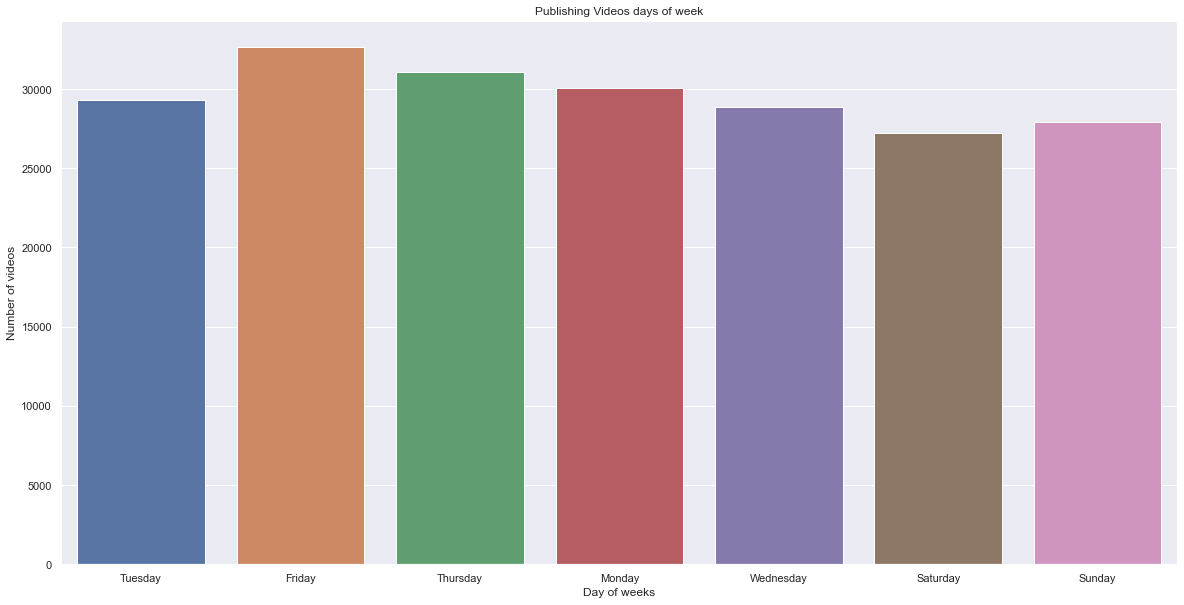

Friday       32683
Thursday     31056
Monday       30052
Tuesday      29326
Wednesday    28886
Sunday       27890
Saturday     27230
Name: day_of_week, dtype: int64


In [1253]:
df_pdw = data_drop_bad_names.copy()
df_pdw['day_of_week'] = data_drop_bad_names['publish_date'].dt.day_name()
plt.figure(figsize=(20,10))
sns.countplot(df_pdw['day_of_week'])
plt.title('Publishing Videos days of week')
plt.xlabel('Day of weeks')
plt.ylabel('Number of videos')
plt.show()

print(df_pdw['day_of_week'].value_counts())

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


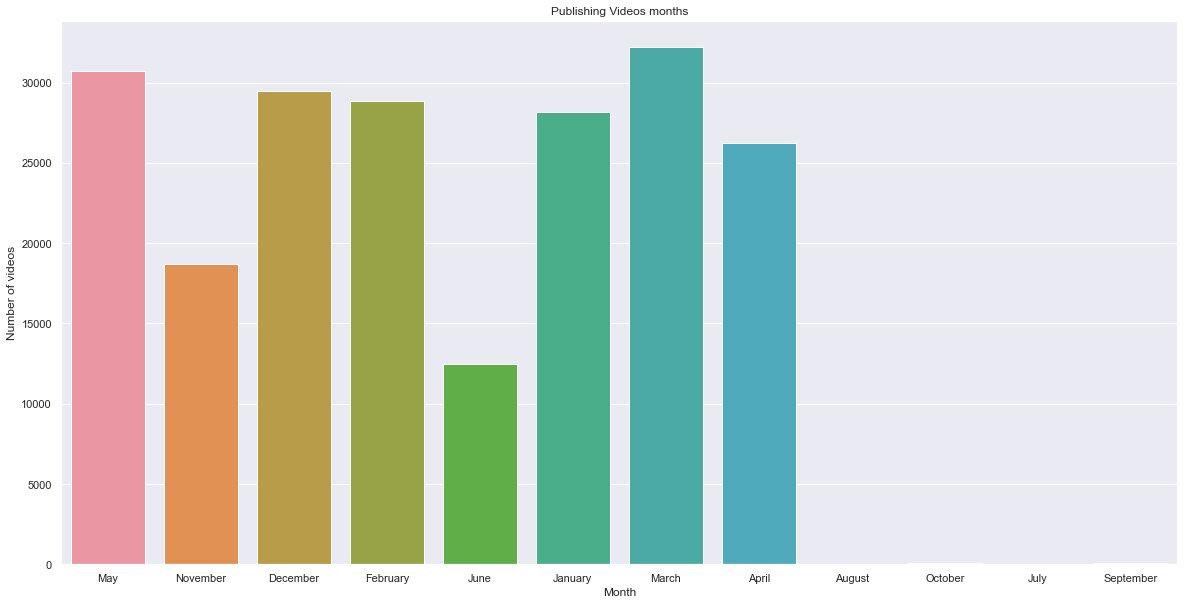

March        32245
May          30750
December     29504
February     28845
January      28197
April        26220
November     18673
June         12482
October         75
September       58
August          40
July            34
Name: month, dtype: int64


In [1254]:
df_pm = data_drop_bad_names.copy()
df_pm['month'] = data_drop_bad_names['publish_date'].dt.month
df_pm['month'] = df_pm['month'].apply(lambda x: calendar.month_name[x])
plt.figure(figsize=(20,10))
sns.countplot(df_pm['month'])
plt.title('Publishing Videos months')
plt.xlabel('Month')
plt.ylabel('Number of videos')
plt.show()

print(df_pm['month'].value_counts())